In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#Importation des données

On pourrait expliquer ici l'origine des données etc

In [ ]:
df1 = pd.read_csv("soil_data.csv", sep=",")
df2 = pd.read_csv("test_timeseries.csv", sep=",")

ParserError: Error tokenizing data. C error: Expected 21 fields in line 314437, saw 29


In [ ]:
df1.head() #Contient les différents états des US avec des caractéristiques géographiques sur les états

fips        lat        lon  elevation  slope1  slope2  slope3  slope4  \
0  1001  32.536382 -86.644490         63  0.0419  0.2788  0.2984  0.2497   
1  1005  31.870670 -85.405456        146  0.0158  0.1868  0.5441  0.2424   
2  1003  30.659218 -87.746067         52  0.0746  0.4370  0.4415  0.0469   
3  1007  33.015893 -87.127148         93  0.0144  0.1617  0.3714  0.3493   
4  1009  33.977448 -86.567246        198  0.0050  0.0872  0.2799  0.3576   

   slope5  slope6  ...  CULTRF_LAND  CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  \
0  0.1142  0.0170  ...    56.293411     1.014811  57.308224    1    1    1   
1  0.0106  0.0003  ...    72.578804     1.828159  74.406960    3    2    1   
2  0.0000  0.0000  ...    59.843639     2.996914  62.840553    3    2    1   
3  0.0898  0.0134  ...     1.916593     0.008330   1.924924    3    2    1   
4  0.1477  0.1037  ...     1.891909     0.027488   1.919397    3    2    1   

   SQ4  SQ5  SQ6  SQ7  
0    1    1    1    2  
1    1    1    1    1  
2    2    1    1    1  
3    1    1    1    1  
4    1    1    1    1  

[5 rows x 32 columns]

In [ ]:
df2.head() #contient pour chaque état des scores de sécheresse sur 2 ans du 1 er janvier 2019 au 31 décembre 2020, en fonction des indices métérologiques journaliers

fips        date PRECTOT      PS  QV2M    T2M T2MDEW T2MWET  T2M_MAX  \
0  1001  2019-01-01    2.25  100.51  9.69  14.71  13.55  13.52    17.38   
1  1001  2019-01-02    4.94  100.48  8.65  13.05  11.83  11.74    17.76   
2  1001  2019-01-03   20.74  100.03  8.59  12.12  11.67  11.67    13.74   
3  1001  2019-01-04   16.17   99.47  7.93   11.8  10.38   9.59    18.19   
4  1001  2019-01-05    0.01  100.39  5.32   7.91   4.73   4.71    14.37   

  T2M_MIN  ...     TS WS10M WS10M_MAX WS10M_MIN WS10M_RANGE  WS50M  WS50M_MAX  \
0   10.92  ...  14.63   1.2       1.5      0.79        0.71   2.74       4.01   
1    9.54  ...  13.06  1.02      1.35      0.32        1.03   2.13       3.37   
2   10.44  ...  12.12  1.83      4.23      0.34        3.88   3.41       7.49   
3    5.44  ...  11.72  3.75      5.25      2.34        2.91   6.78       9.61   
4    3.68  ...   7.75  2.32       2.9      1.69        1.21   4.42       5.87   

  WS50M_MIN  WS50M_RANGE  score  
0      1.23         2.78    0.0  
1      0.56         2.81    NaN  
2      0.72         6.77    NaN  
3      4.90         4.71    NaN  
4      3.15         2.72    NaN  

[5 rows x 21 columns]

In [ ]:
X = df2.merge(df1, on='fips', how='left')
X.head()

fips        date PRECTOT      PS  QV2M    T2M T2MDEW T2MWET  T2M_MAX  \
0  1001  2019-01-01    2.25  100.51  9.69  14.71  13.55  13.52    17.38   
1  1001  2019-01-02    4.94  100.48  8.65  13.05  11.83  11.74    17.76   
2  1001  2019-01-03   20.74  100.03  8.59  12.12  11.67  11.67    13.74   
3  1001  2019-01-04   16.17   99.47  7.93   11.8  10.38   9.59    18.19   
4  1001  2019-01-05    0.01  100.39  5.32   7.91   4.73   4.71    14.37   

  T2M_MIN  ... CULTRF_LAND CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  SQ4  SQ5  \
0   10.92  ...   56.293411    1.014811  57.308224  1.0  1.0  1.0  1.0  1.0   
1    9.54  ...   56.293411    1.014811  57.308224  1.0  1.0  1.0  1.0  1.0   
2   10.44  ...   56.293411    1.014811  57.308224  1.0  1.0  1.0  1.0  1.0   
3    5.44  ...   56.293411    1.014811  57.308224  1.0  1.0  1.0  1.0  1.0   
4    3.68  ...   56.293411    1.014811  57.308224  1.0  1.0  1.0  1.0  1.0   

   SQ6  SQ7  
0  1.0  2.0  
1  1.0  2.0  
2  1.0  2.0  
3  1.0  2.0  
4  1.0  2.0  

[5 rows x 52 columns]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838166 entries, 0 to 3838165
Data columns (total 52 columns):
 #   Column         Dtype  
---  ------         -----  
 0   fips           object 
 1   date           object 
 2   PRECTOT        object 
 3   PS             object 
 4   QV2M           object 
 5   T2M            object 
 6   T2MDEW         object 
 7   T2MWET         object 
 8   T2M_MAX        float64
 9   T2M_MIN        object 
 10  T2M_RANGE      object 
 11  TS             object 
 12  WS10M          object 
 13  WS10M_MAX      object 
 14  WS10M_MIN      object 
 15  WS10M_RANGE    float64
 16  WS50M          float64
 17  WS50M_MAX      object 
 18  WS50M_MIN      float64
 19  WS50M_RANGE    float64
 20  score          float64
 21  lat            float64
 22  lon            float64
 23  elevation      float64
 24  slope1         float64
 25  slope2         float64
 26  slope3         float64
 27  slope4         float64
 28  slope5         float64
 29  slope6        

#Analyse des valeurs manquantes du score

In [ ]:
X.isna().sum()

L'unique variable contenant des valeurs manquantes est la variable score qui est la variable cible.  On remarque tout de même un grand nombre de valeurs manquantes, pour cette raison on va réliser une analyse.

In [ ]:
X_analysis = df2.copy()
X_analysis["score_present"] = X_analysis["score"].notna()
X_analysis["date"] = pd.to_datetime(X_analysis["date"], errors="coerce") #on transforme en type date afin de pouvoir calculer des intervalles de différences entre les valeurs des scores présentent
X_analysis["score_present"] = X_analysis["score"].notna()
X_obs = X_analysis[X_analysis["score_present"]].copy() #on garde les lignes où on observe le score
X_obs = X_obs.sort_values(["fips", "date"])
X_obs["days_diff"] = X_obs.groupby("fips")["date"].diff().dt.days

In [ ]:
print("\n--- Analyse pour quelques états (fips) ---")

# Prendre 3 fips (parmi ceux où on a des scores observés)
for fips_sample in X_obs["fips"].dropna().unique()[:3]:
    df_fips_all = X_analysis[X_analysis["fips"] == fips_sample]   # total jours (toutes lignes)
    df_score = X_obs[X_obs["fips"] == fips_sample]                # seulement scores observés + days_diff

    diffs = df_score["days_diff"].dropna()  # la 1ère obs par fips = NaN

    print(f"\nÉtat (fips) {fips_sample}:")
    print(f"  Nombre total de jours: {len(df_fips_all)}")
    print(f"  Nombre de mesures de score: {len(df_score)}")
    print(f"  Intervalles entre mesures (jours): {diffs.value_counts().sort_index().to_dict()}")


--- Analyse pour quelques états (fips) ---

État (fips) 1001:
  Nombre total de jours: 731
  Nombre de mesures de score: 105
  Intervalles entre mesures (jours): {7.0: 104}

État (fips) 1003:
  Nombre total de jours: 731
  Nombre de mesures de score: 105
  Intervalles entre mesures (jours): {7.0: 104}

État (fips) 1005:
  Nombre total de jours: 731
  Nombre de mesures de score: 105
  Intervalles entre mesures (jours): {7.0: 104}


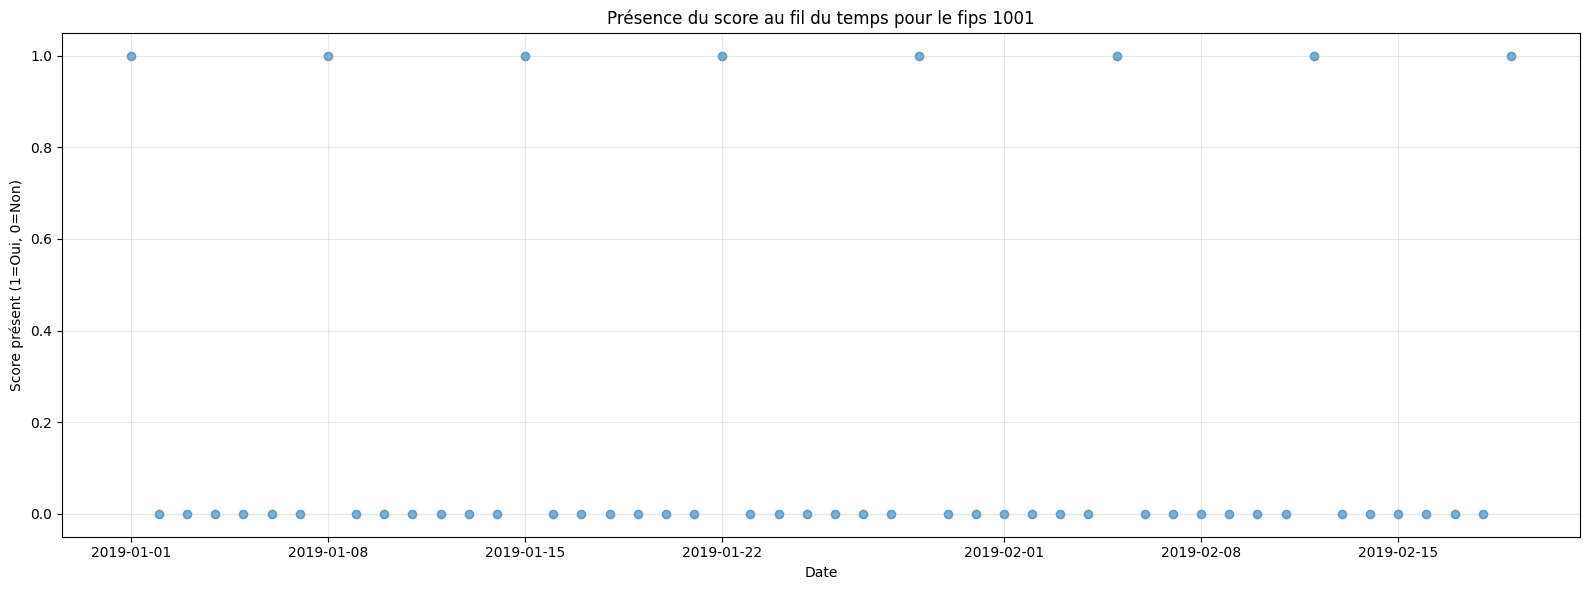

In [ ]:
# Visualisation
fig, axes = plt.subplots(1, 1, figsize=(16, 6))

# Exemple pour un état spécifique
fips_example = X_analysis['fips'].iloc[0]
df_example = X_analysis[X_analysis['fips'] == fips_example].head(50) #exemple avec les 50 premiers jours
axes.scatter(df_example['date'], df_example['score_present'], alpha=0.6)
axes.set_xlabel('Date')
axes.set_ylabel('Score présent (1=Oui, 0=Non)')
axes.set_title(f'Présence du score au fil du temps pour le fips {fips_example}')
axes.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("Distribution des intervalles entre mesures du score (en jours):")
print(X_obs["days_diff"].dropna().value_counts().sort_index())

Distribution des intervalles entre mesures du score (en jours):
days_diff
7.0    323232
Name: count, dtype: int64


On remarque donc que les valeurs manquantes sur la variable cible score proviennent du fait que la mesure effectuée n'est pas journalière mais tous les 7 jours. Or les données de la Nasa sont elles jounalières. En raison de la suffisance des données qu'on a notre disposition, on décide de les supprimer du dataset.

In [ ]:
X = X[X['score'].notnull()].reset_index(drop=True)

On remarque en plus que les données sont continues, on décide de les discrétiser pour créer des classes de score.

In [ ]:
X["score"] = (X["score"]).astype(int)

#Data vizualisation

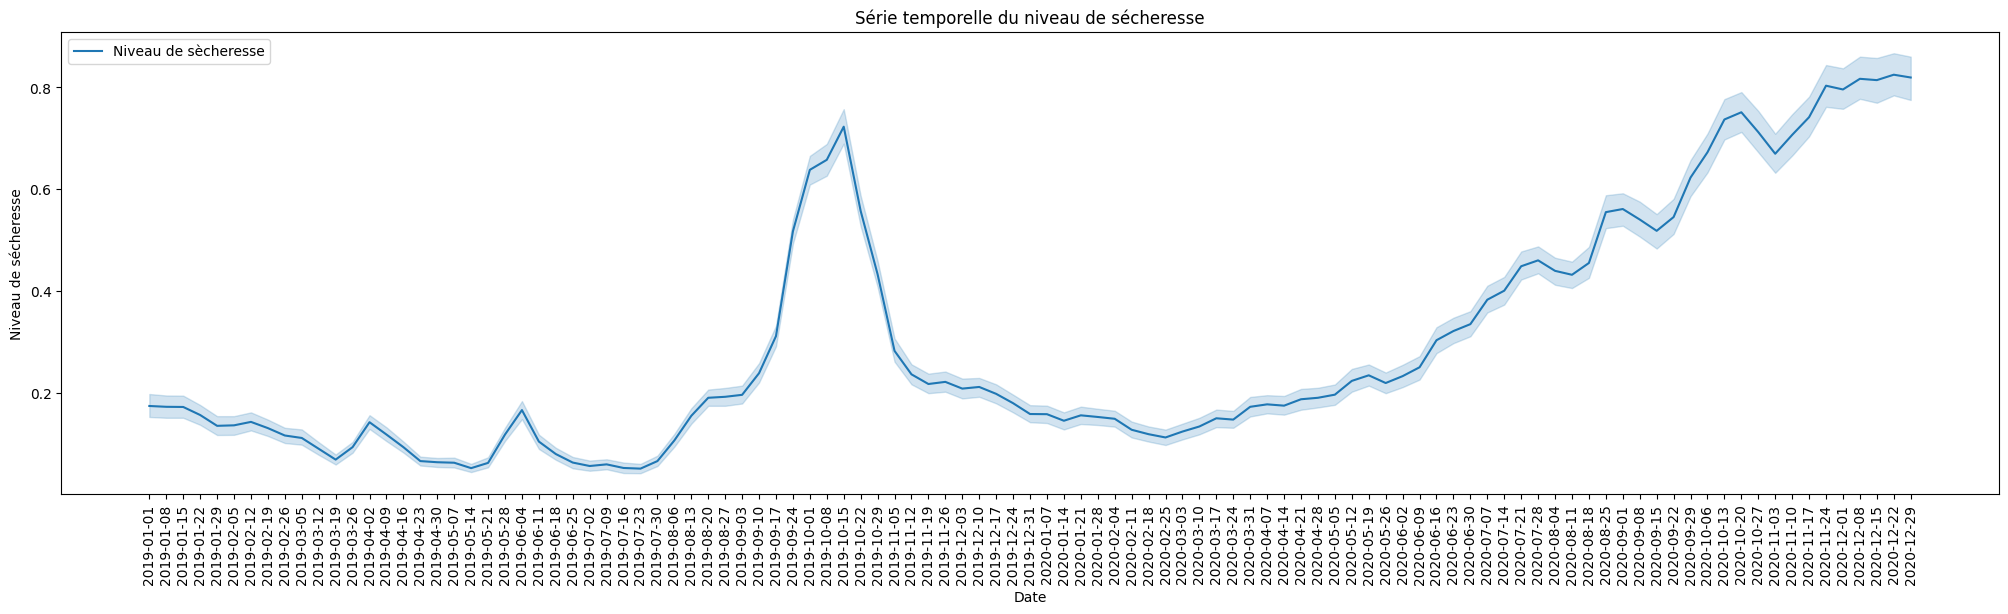

In [ ]:
plt.figure(figsize=(25, 6))
sns.lineplot(x=X['date'], y=X["score"], label='Niveau de sècheresse')
plt.legend()
plt.title('Série temporelle du niveau de sécheresse')
plt.xlabel('Date')
plt.ylabel('Niveau de sécheresse')
plt.xticks(rotation=90)
plt.show()

Le niveau de sécheresse augmente en fonction du temps, ce qui est cohérent avec notre contexte actuel de réchauffement climatique.

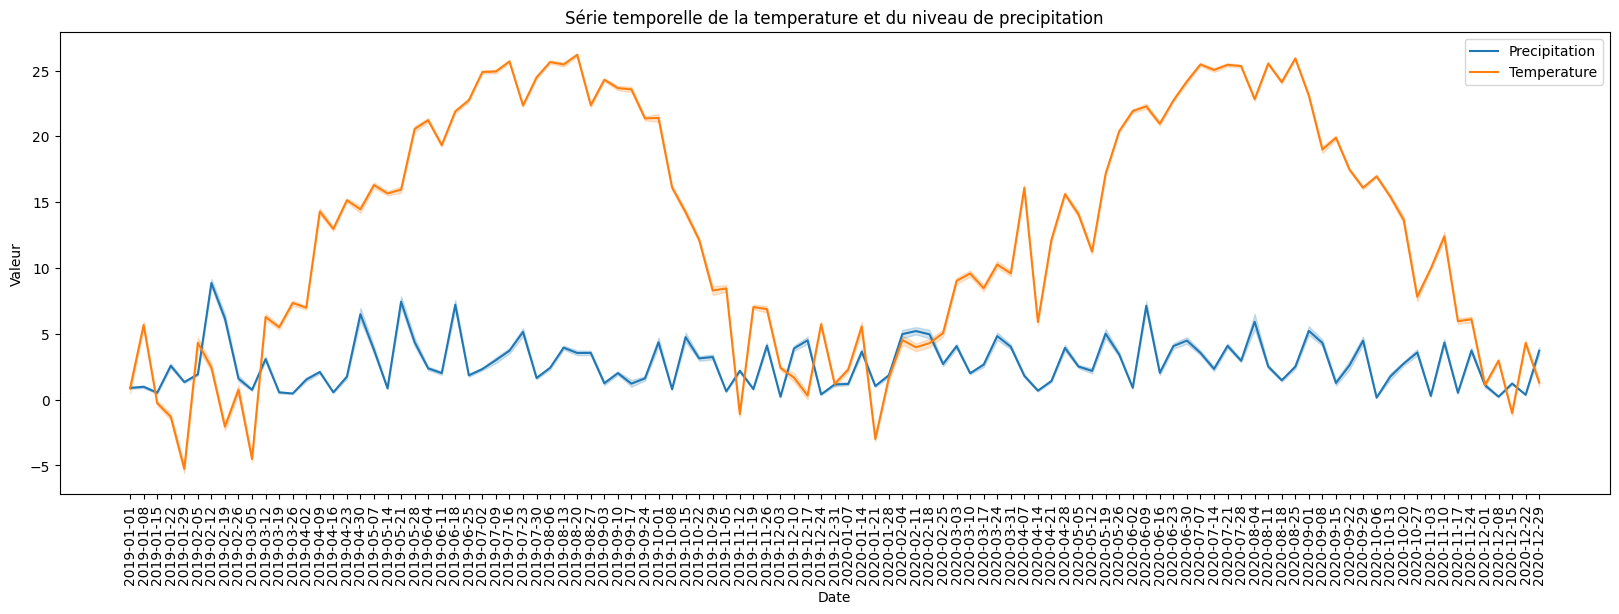

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=X, x='date', y='PRECTOT', label='Precipitation')
sns.lineplot(data=X, x='date', y='T2M', label='Temperature')
plt.title('Série temporelle de la temperature et du niveau de precipitation')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.xticks(rotation=90)
plt.show()

On identifie le cylce saisonnier des température.

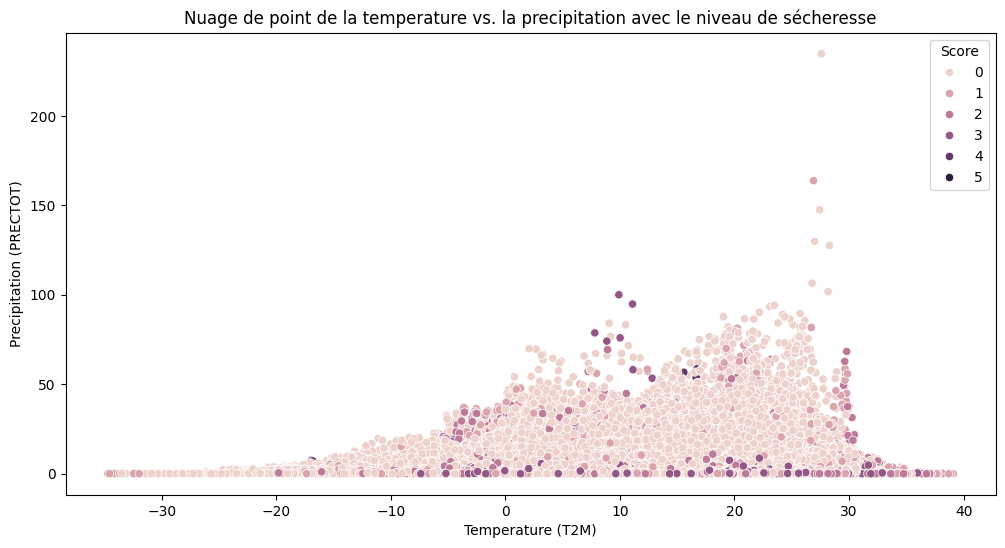

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=X, x='T2M', y='PRECTOT', hue=X["score"])
plt.title("Nuage de point de la temperature vs. la precipitation avec le niveau de sécheresse")
plt.xlabel('Temperature (T2M)')
plt.ylabel('Precipitation (PRECTOT)')
plt.legend(title='Score')
plt.show()

#Statistiques déscriptives

In [ ]:
display(X.describe().T) #Pour les variables numériques
display(X.describe(include=['object'])) #Pour les variables catégorielles

count          mean           std          min  \
fips           326340.0  30670.376770  14979.130338  1001.000000   
PRECTOT        326340.0      2.773609      6.271320     0.000000   
PS             326340.0     96.664013      5.439992    66.930000   
QV2M           326340.0      8.193530      4.956830     0.150000   
T2M            326340.0     12.809354     10.990227   -34.690000   
T2MDEW         326340.0      7.637028     10.524875   -37.840000   
T2MWET         326340.0      7.681143     10.260454   -34.830000   
T2M_MAX        326340.0     18.447932     11.575784   -28.350000   
T2M_MIN        326340.0      7.651906     10.755246   -41.960000   
T2M_RANGE      326340.0     10.796031      3.835380     0.120000   
TS             326340.0     12.848721     11.180749   -35.770000   
WS10M          326340.0      3.503870      1.774304     0.400000   
WS10M_MAX      326340.0      5.135148      2.542583     0.710000   
WS10M_MIN      326340.0      1.874162      1.275018     0.000000   
WS10M_RANGE    326340.0      3.260994      1.934575     0.260000   
WS50M          326340.0      5.454730      2.204150     0.700000   
WS50M_MAX      326340.0      7.736035      2.747975     1.270000   
WS50M_MIN      326340.0      3.049395      2.024862     0.000000   
WS50M_RANGE    326340.0      4.686642      2.163710     0.530000   
score          326340.0      0.297156      0.721083     0.000000   
lat            326340.0     38.278261      4.837610    25.601043   
lon            326340.0    -91.655636     11.482973  -124.211407   
elevation      326340.0    427.351673    499.928014    -1.000000   
slope1         326340.0      0.054986      0.089870     0.000000   
slope2         326340.0      0.297783      0.215943     0.000000   
slope3         326340.0      0.319896      0.167643     0.000000   
slope4         326340.0      0.155874      0.128400     0.000000   
slope5         326340.0      0.053425      0.073101     0.000000   
slope6         326340.0      0.065344      0.125521     0.000000   
slope7         326340.0      0.022230      0.064126     0.000000   
slope8         326340.0      0.009270      0.044933     0.000000   
aspectN        326340.0      0.143746      0.078237     0.000000   
aspectE        326340.0      0.168858      0.084088     0.000000   
aspectS        326340.0      0.148378      0.082108     0.000000   
aspectW        326340.0      0.165056      0.087842     0.000000   
aspectUnknown  326340.0      0.352769      0.272171     0.000000   
WAT_LAND       326340.0      2.851428     13.159168     0.000000   
NVG_LAND       326340.0      1.799070      7.970712     0.000000   
URB_LAND       326340.0      2.670885      9.770591     0.000000   
GRS_LAND       326340.0     19.789316     25.415592     0.000000   
FOR_LAND       326340.0     39.309230     34.358350     0.000000   
CULTRF_LAND    326340.0     28.503972     31.835447     0.000000   
CULTIR_LAND    326340.0      3.505807     10.290717     0.000000   
CULT_LAND      326340.0     32.009779     33.094731     0.000000   
SQ1            326340.0      1.830759      1.192128     0.000000   
SQ2            326340.0      1.553732      1.021336     0.000000   
SQ3            326340.0      1.281853      1.002427     0.000000   
SQ4            326340.0      1.357465      1.030092     0.000000   
SQ5            326340.0      1.147040      0.922305     0.000000   
SQ6            326340.0      1.135135      0.914500     0.000000   
SQ7            326340.0      1.284749      1.017385     0.000000   

                        25%           50%           75%           max  
fips           19044.500000  29212.000000  46007.500000  56043.000000  
PRECTOT            0.000000      0.200000      2.540000    234.800000  
PS                95.860000     98.310000     99.970000    103.790000  
QV2M               3.910000      7.050000     12.190000     21.800000  
T2M                4.380000     13.950000     22.070000     39.110000  
T2MDEW            -0.360000      8.200000     16.

date
count       326340
unique         105
top     2019-01-01
freq          3108

L'unique variable non numérique qu'on aperçoit dans notre base de données, on va donc la retraiter.

In [ ]:
def Split_Date(df):
  df['date'] = pd.to_datetime(df['date'])
  df['day'] = df['date'].dt.day
  df['month'] = df['date'].dt.month
  df['year'] = df['date'].dt.year
  return df

In [ ]:
X["date"]

0         2019-01-01
1         2019-01-08
2         2019-01-15
3         2019-01-22
4         2019-01-29
             ...    
326335    2020-12-01
326336    2020-12-08
326337    2020-12-15
326338    2020-12-22
326339    2020-12-29
Name: date, Length: 326340, dtype: object

In [ ]:
X = Split_Date(X)

In [ ]:
X = X.drop(['date'], axis =1) #Pour éviter la redondance

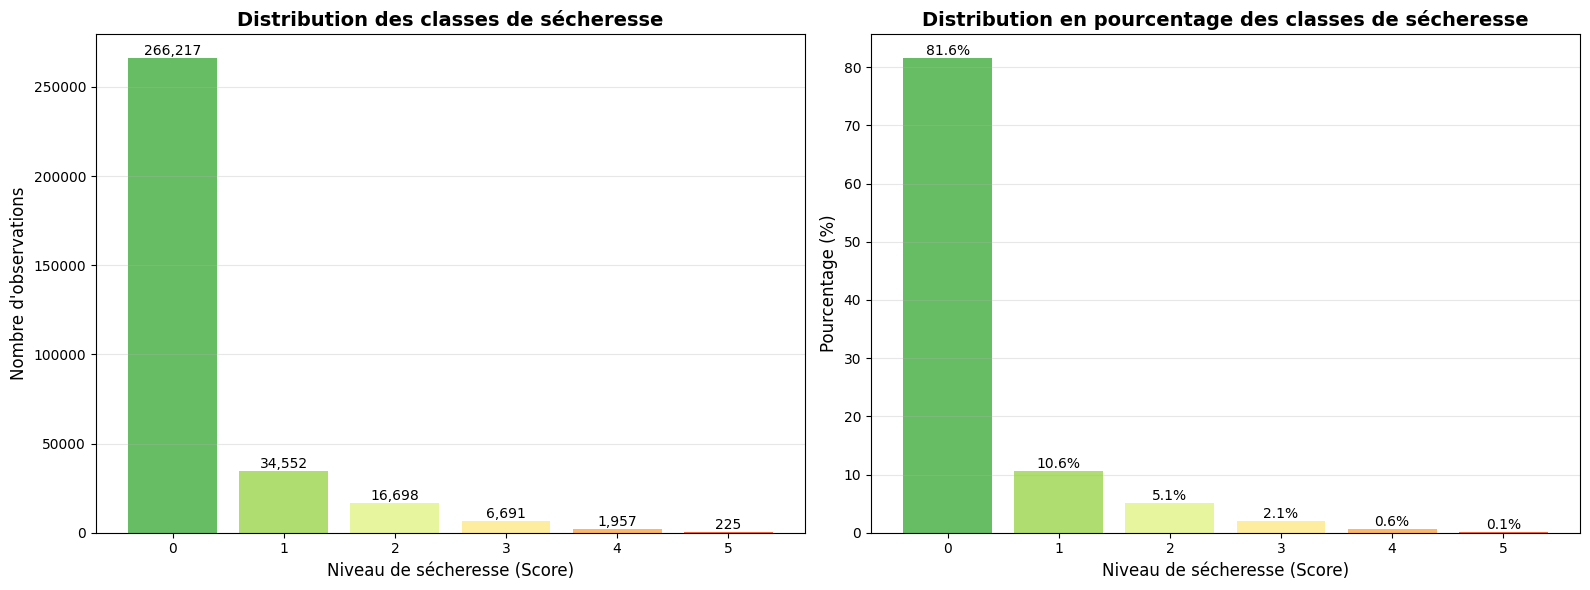

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Comptage par classe
score_counts = X['score'].value_counts().sort_index()
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(score_counts)))

axes[0].bar(score_counts.index, score_counts.values, color=colors)
axes[0].set_xlabel('Niveau de sécheresse (Score)', fontsize=12)
axes[0].set_ylabel('Nombre d\'observations', fontsize=12)
axes[0].set_title('Distribution des classes de sécheresse', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, (idx, val) in enumerate(score_counts.items()):
    axes[0].text(idx, val, f'{val:,}', ha='center', va='bottom', fontsize=10)

# Graphique 2: Pourcentages
score_percentages = (X['score'].value_counts(normalize=True).sort_index() * 100)
axes[1].bar(score_percentages.index, score_percentages.values, color=colors)
axes[1].set_xlabel('Niveau de sécheresse (Score)', fontsize=12)
axes[1].set_ylabel('Pourcentage (%)', fontsize=12)
axes[1].set_title('Distribution en pourcentage des classes de sécheresse', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Ajouter les pourcentages sur les barres
for i, (idx, val) in enumerate(score_percentages.items()):
    axes[1].text(idx, val, f'{val:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


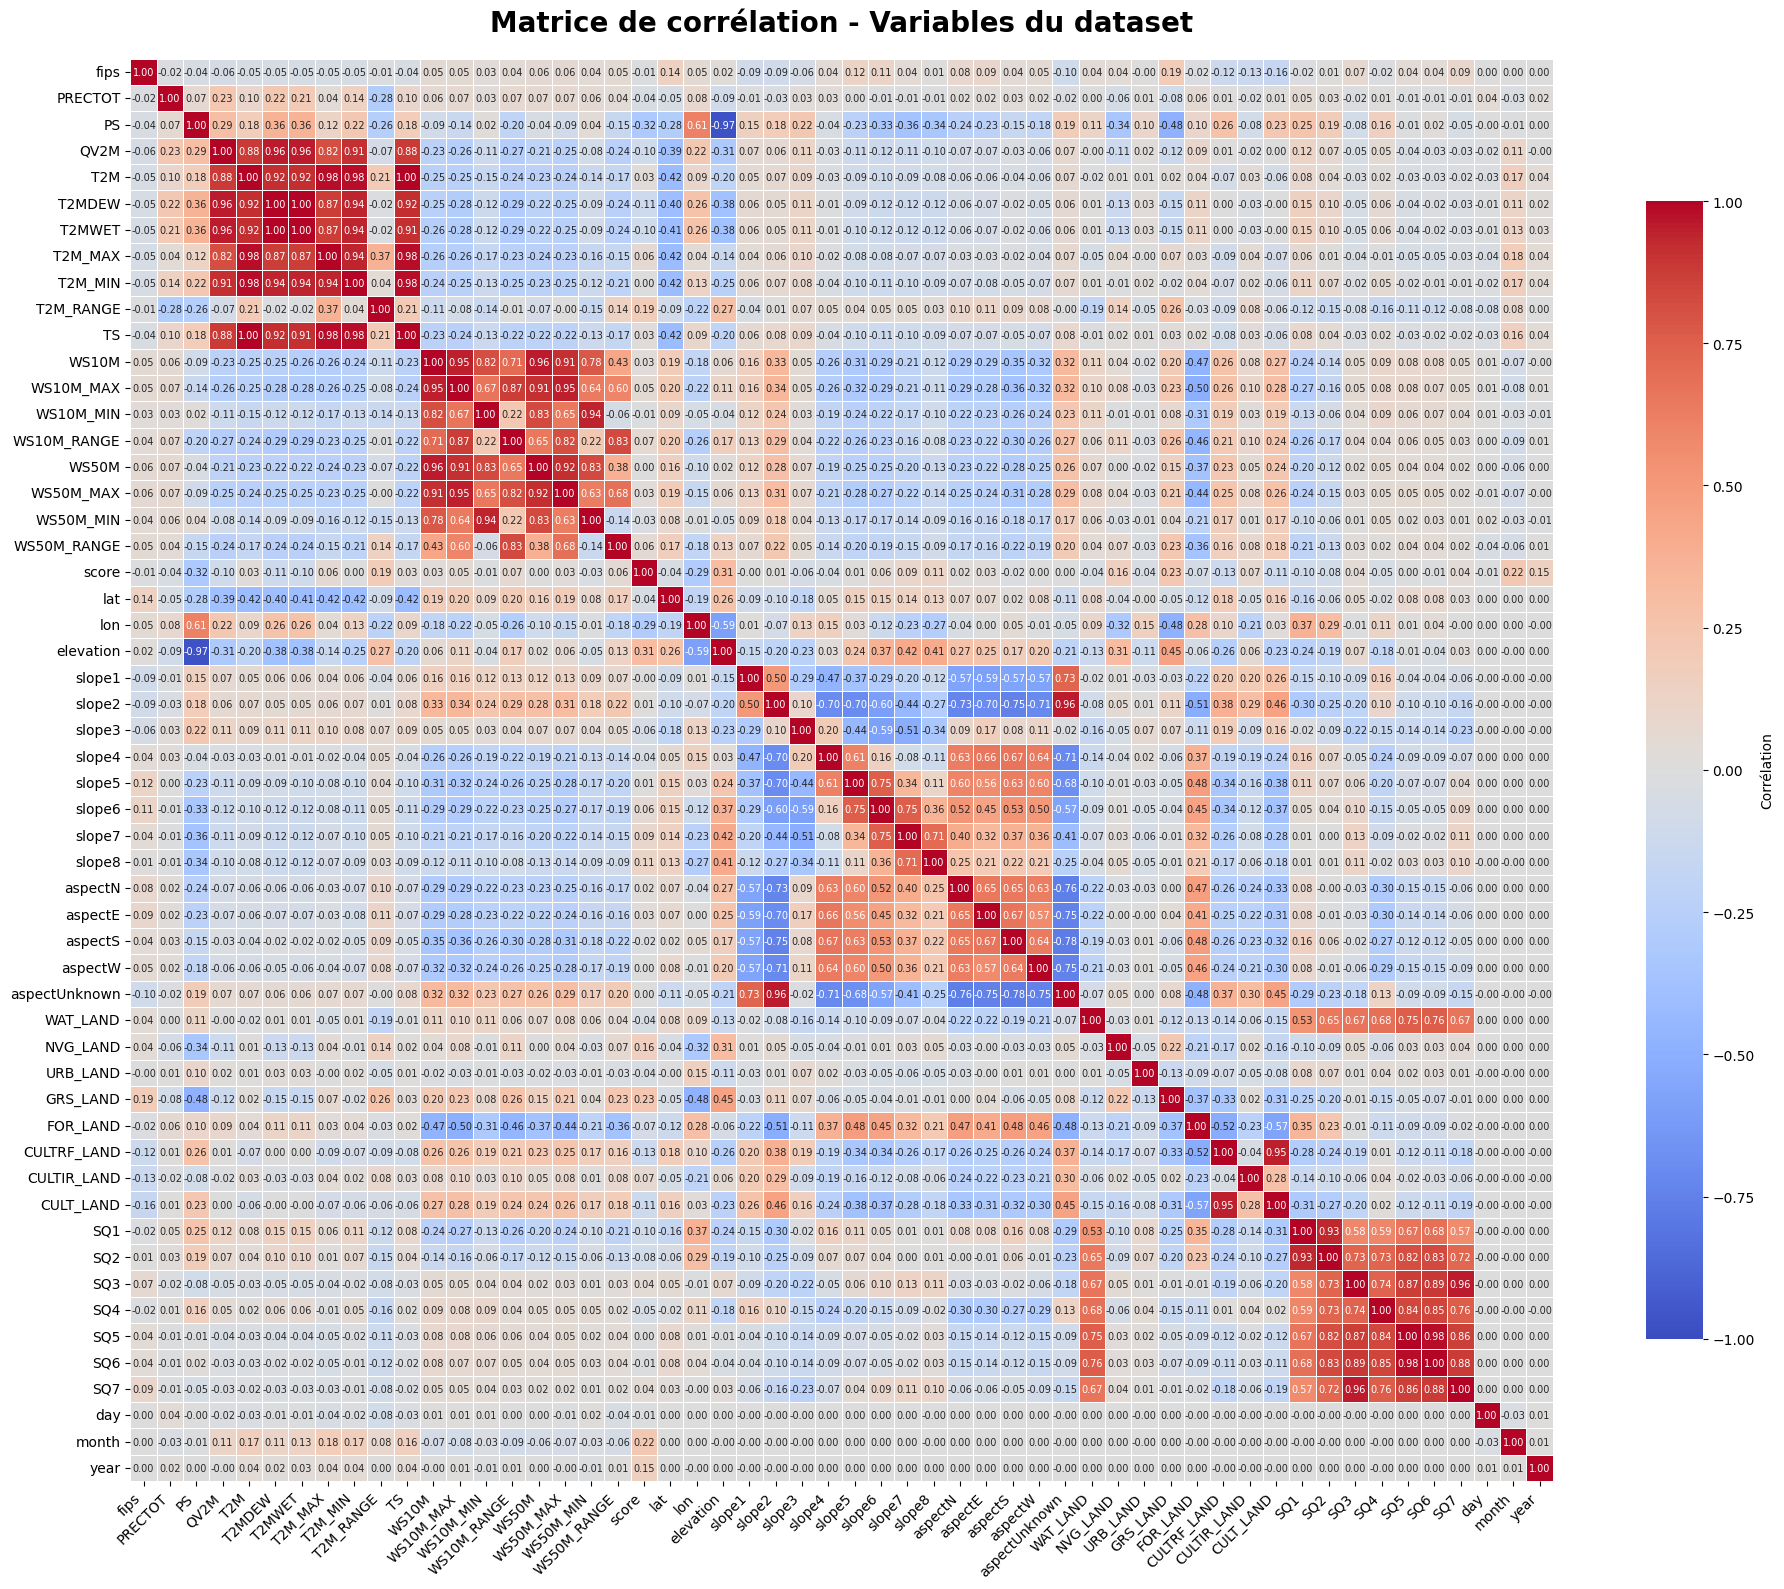

In [ ]:
correlation_matrix = X.corr().round(2)

plt.figure(figsize=(20, 16)) # Créer une figure avec une taille appropriée

# Créer la heatmap
sns.heatmap(data=correlation_matrix,
            annot=True,                          # Afficher les valeurs
            fmt='.2f',                           # Format avec 2 décimales
            annot_kws={"size": 7},              # Taille de police des valeurs
            cmap='coolwarm',                     # Palette de couleurs (rouge-bleu)
            center=0,                            # Centrer la palette sur 0
            vmin=-1, vmax=1,                    # Échelle de -1 à 1
            square=True,                         # Cellules carrées
            linewidths=0.5,                     # Lignes entre cellules
            linecolor='white',                   # Couleur des lignes
            cbar_kws={'shrink': 0.8, 'label': 'Corrélation'})  # Barre de couleur

plt.title("Matrice de corrélation - Variables du dataset", fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)


plt.tight_layout() # Ajuster l'espacement
plt.show()

On remarque que les variables sur la vitesse du vent, la température etc sont très corrélées.

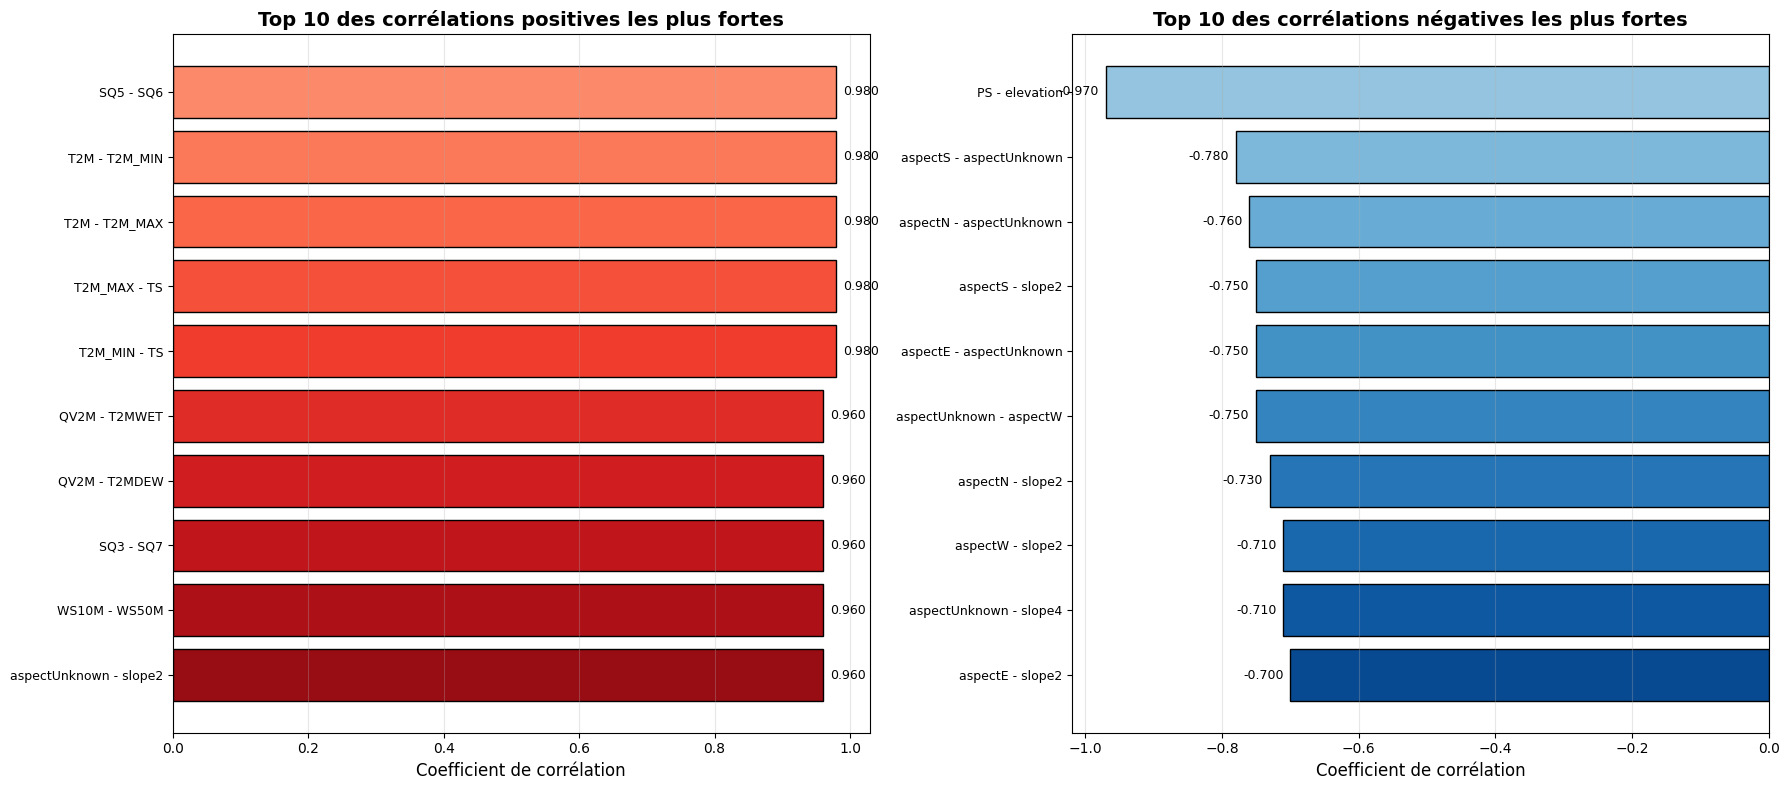

In [ ]:
corr_pairs = correlation_matrix.unstack() # Créer un DataFrame avec les corrélations
corr_pairs = corr_pairs[corr_pairs < 1]  # Exclure la diagonale (corrélation = 1)

corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) < corr_pairs.index.get_level_values(1)]

positive_corr = corr_pairs[corr_pairs > 0].sort_values(ascending=False)
negative_corr = corr_pairs[corr_pairs < 0].sort_values(ascending=True)

top_positive = positive_corr.head(10)
top_negative = negative_corr.head(10)

def create_labels(series):
    labels = []
    for idx in series.index:
        labels.append(f"{idx[0]} - {idx[1]}")
    return labels

# Créer la figure avec 2 sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Graphique 1: Top 10 corrélations positives
colors_pos = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_positive)))
axes[0].barh(range(len(top_positive)), top_positive.values, color=colors_pos, edgecolor='black')
axes[0].set_yticks(range(len(top_positive)))
axes[0].set_yticklabels(create_labels(top_positive), fontsize=9)
axes[0].set_xlabel('Coefficient de corrélation', fontsize=12)
axes[0].set_title('Top 10 des corrélations positives les plus fortes', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Ajouter les valeurs sur les barres
for i, v in enumerate(top_positive.values):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

# Graphique 2: Top 10 corrélations négatives (les plus fortes en valeur absolue)
colors_neg = plt.cm.Blues(np.linspace(0.4, 0.9, len(top_negative)))
axes[1].barh(range(len(top_negative)), top_negative.values, color=colors_neg, edgecolor='black')
axes[1].set_yticks(range(len(top_negative)))
axes[1].set_yticklabels(create_labels(top_negative), fontsize=9)
axes[1].set_xlabel('Coefficient de corrélation', fontsize=12)
axes[1].set_title('Top 10 des corrélations négatives les plus fortes', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

# Ajouter les valeurs sur les barres
for i, v in enumerate(top_negative.values):
    axes[1].text(v - 0.01, i, f'{v:.3f}', va='center', ha='right', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Afficher aussi le tableau sous forme textuelle
print("\n" + "="*70)
print("TOP 10 DES CORRÉLATIONS POSITIVES LES PLUS FORTES")
print("="*70)
for (var1, var2), corr in top_positive.items():
    print(f"{var1:20s} <-> {var2:20s} : {corr:6.3f}")

print("\n" + "="*70)
print("TOP 10 DES CORRÉLATIONS NÉGATIVES LES PLUS FORTES")
print("="*70)
for (var1, var2), corr in top_negative.items():
    print(f"{var1:20s} <-> {var2:20s} : {corr:6.3f}")


TOP 10 DES CORRÉLATIONS POSITIVES LES PLUS FORTES
SQ5                  <-> SQ6                  :  0.980
T2M                  <-> T2M_MIN              :  0.980
T2M                  <-> T2M_MAX              :  0.980
T2M_MAX              <-> TS                   :  0.980
T2M_MIN              <-> TS                   :  0.980
QV2M                 <-> T2MWET               :  0.960
QV2M                 <-> T2MDEW               :  0.960
SQ3                  <-> SQ7                  :  0.960
WS10M                <-> WS50M                :  0.960
aspectUnknown        <-> slope2               :  0.960

TOP 10 DES CORRÉLATIONS NÉGATIVES LES PLUS FORTES
PS                   <-> elevation            : -0.970
aspectS              <-> aspectUnknown        : -0.780
aspectN              <-> aspectUnknown        : -0.760
aspectS              <-> slope2               : -0.750
aspectE              <-> aspectUnknown        : -0.750
aspectUnknown        <-> aspectW              : -0.750
aspectN           

On s'intéresse à présent aux corrélations linéaires les plus fortes avec la variable cible "score".

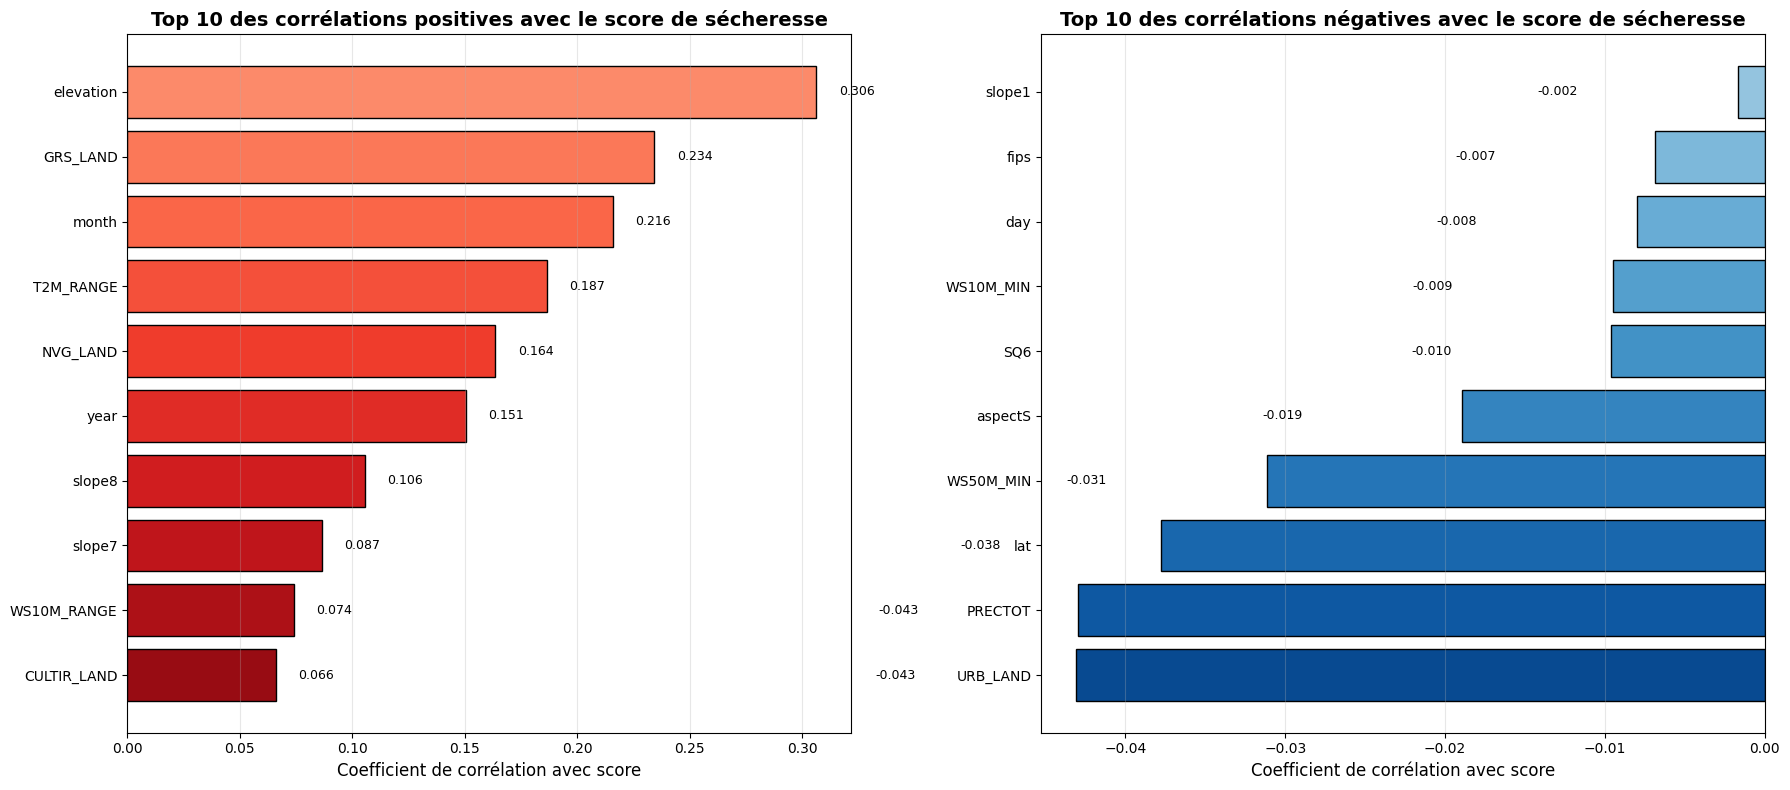

In [ ]:
# Calculer les corrélations avec la variable score
correlations_with_score = X.corr()['score'].drop('score').sort_values(ascending=False)

positive_corr_score = correlations_with_score[correlations_with_score > 0].head(10)
negative_corr_score = correlations_with_score[correlations_with_score < 0].head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Graphique 1: Top 10 corrélations positives avec score
colors_pos = plt.cm.Reds(np.linspace(0.4, 0.9, len(positive_corr_score)))
axes[0].barh(range(len(positive_corr_score)), positive_corr_score.values, color=colors_pos, edgecolor='black')
axes[0].set_yticks(range(len(positive_corr_score)))
axes[0].set_yticklabels(positive_corr_score.index, fontsize=10)
axes[0].set_xlabel('Coefficient de corrélation avec score', fontsize=12)
axes[0].set_title('Top 10 des corrélations positives avec le score de sécheresse', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Ajouter les valeurs sur les barres
for i, v in enumerate(positive_corr_score.values):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

# Graphique 2: Top 10 corrélations négatives avec score
colors_neg = plt.cm.Blues(np.linspace(0.4, 0.9, len(negative_corr_score)))
axes[1].barh(range(len(negative_corr_score)), negative_corr_score.values, color=colors_neg, edgecolor='black')
axes[1].set_yticks(range(len(negative_corr_score)))
axes[1].set_yticklabels(negative_corr_score.index, fontsize=10)
axes[1].set_xlabel('Coefficient de corrélation avec score', fontsize=12)
axes[1].set_title('Top 10 des corrélations négatives avec le score de sécheresse', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

# Ajouter les valeurs sur les barres
for i, v in enumerate(negative_corr_score.values):
    axes[1].text(v - 0.01, i, f'{v:.3f}', va='center', ha='right', fontsize=9)

plt.tight_layout()
plt.show()

La variable sur l'elevation du sol est la variable la plus corrélée avec le score. Cette matrice nous donne une idée des variables corrélées linéairement au score. Cependant, on ne peut pas choisir des variables en fonction de cette métrique car il peut y avoir des dépendances non linéaires.

On s'intéresse à présent à la distribution des variables explicatives.

In [ ]:
var_num = [x for x in X.select_dtypes(include=["int64", "float64", "int32"])]
var_cat = ["fips", "score", "year", "month", "day",'SQ1','SQ2','SQ3','SQ4','SQ5','SQ6','SQ7'] #variables non cotinues
var_num = [i for i in var_num if i not in var_cat]
X_num = X[var_num]

##Distribution des variables continues

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


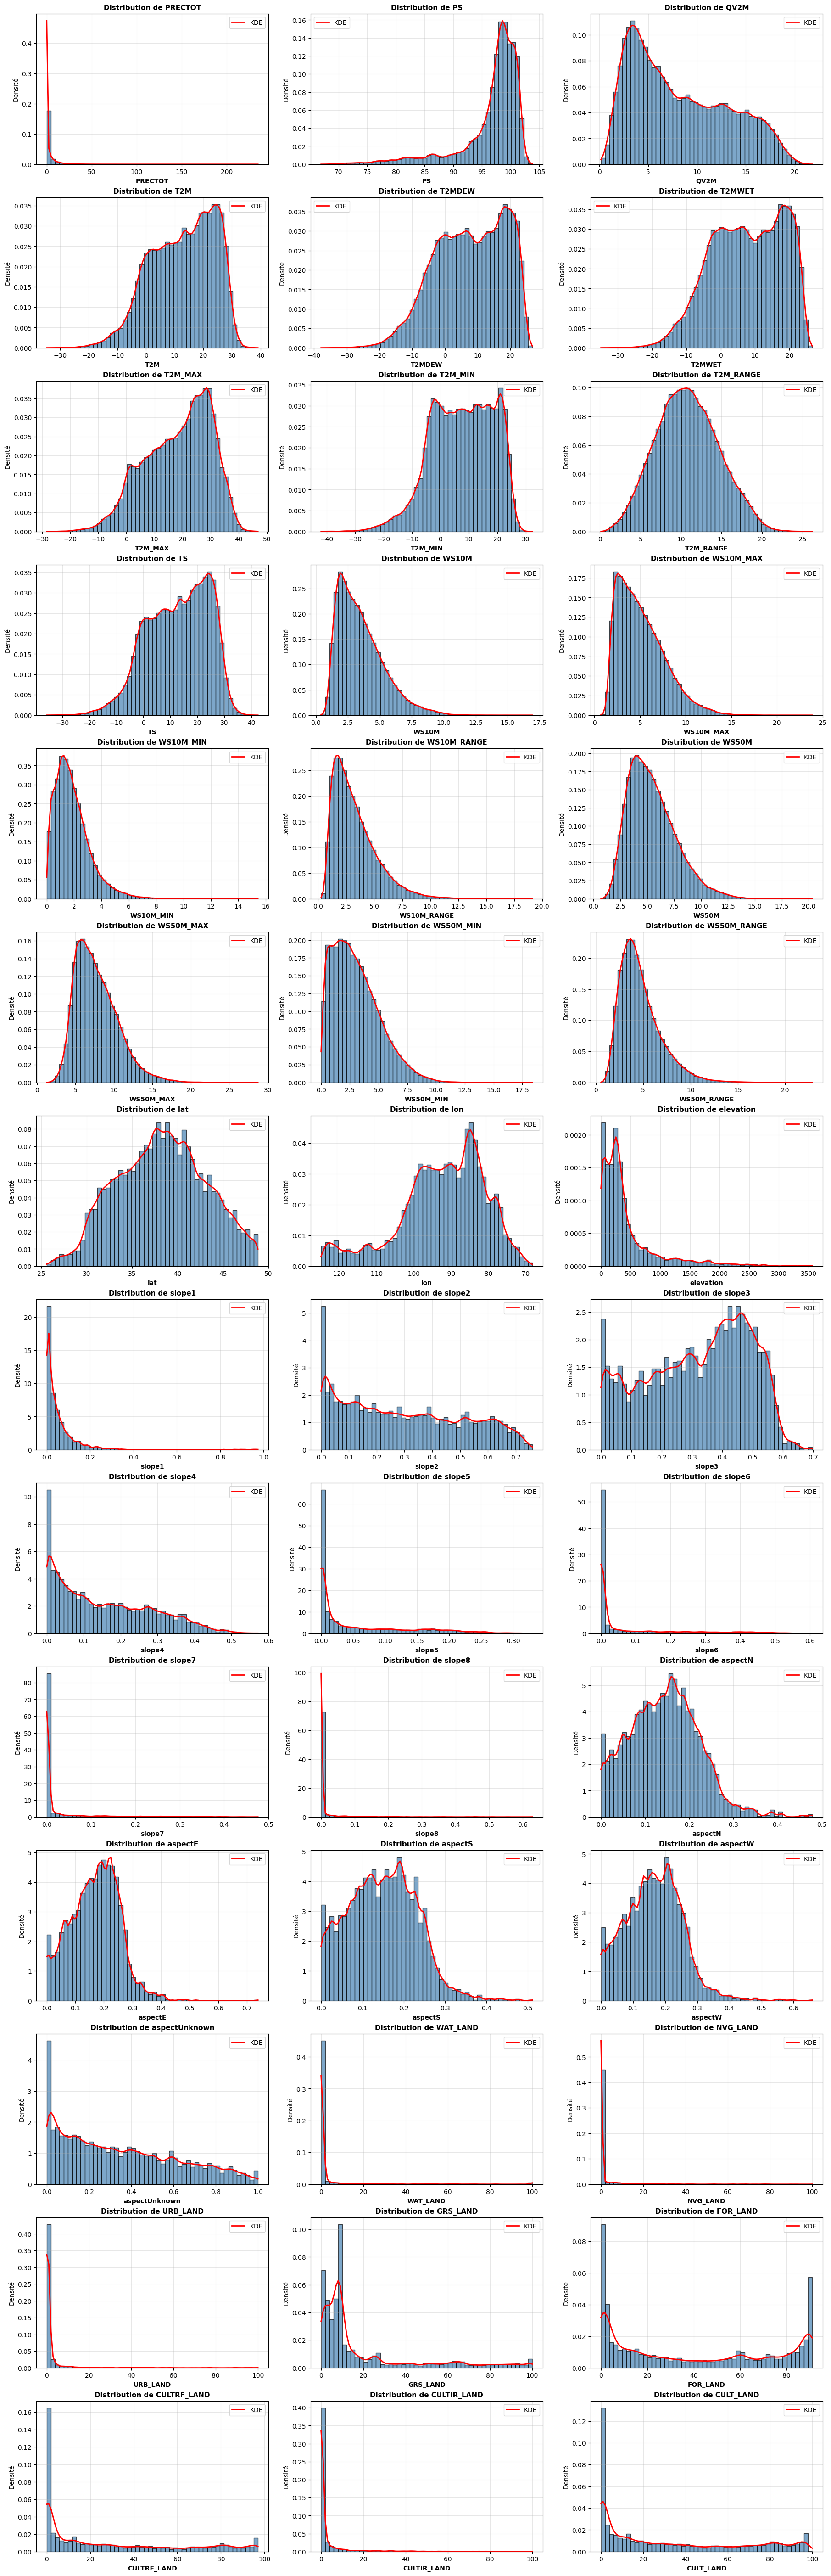

In [ ]:
from scipy.stats import gaussian_kde

num_cols = 3  # Nombre d'histogrammes par ligne
num_rows = (len(var_num) + num_cols - 1) // num_cols  # Nombre de lignes dont nous avons besoin

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4), constrained_layout=True)
axes = axes.flatten()  # Pour améliorer les itérations

for i, col_name in enumerate(var_num):
    ax = axes[i]
    ax.hist(X_num[col_name], bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')

    # Vérifier si la variable est continue (plus de 20 valeurs uniques)
    n_unique = X_num[col_name].nunique()

    # Ajouter une ligne de densité (KDE) uniquement pour les variables continues
    if n_unique > 20:
        try:
            kde = gaussian_kde(X_num[col_name].dropna())
            x_range = np.linspace(X_num[col_name].min(), X_num[col_name].max(), 100)
            ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
            ax.legend()
        except:
            pass

    ax.set_xlabel(col_name, fontsize=10, fontweight='bold')
    ax.set_ylabel('Densité', fontsize=10)
    ax.set_title(f'Distribution de {col_name}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

# Masquer les axes vides si le nombre de variables n'est pas un multiple de num_cols
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

##Distributions des variables non continues

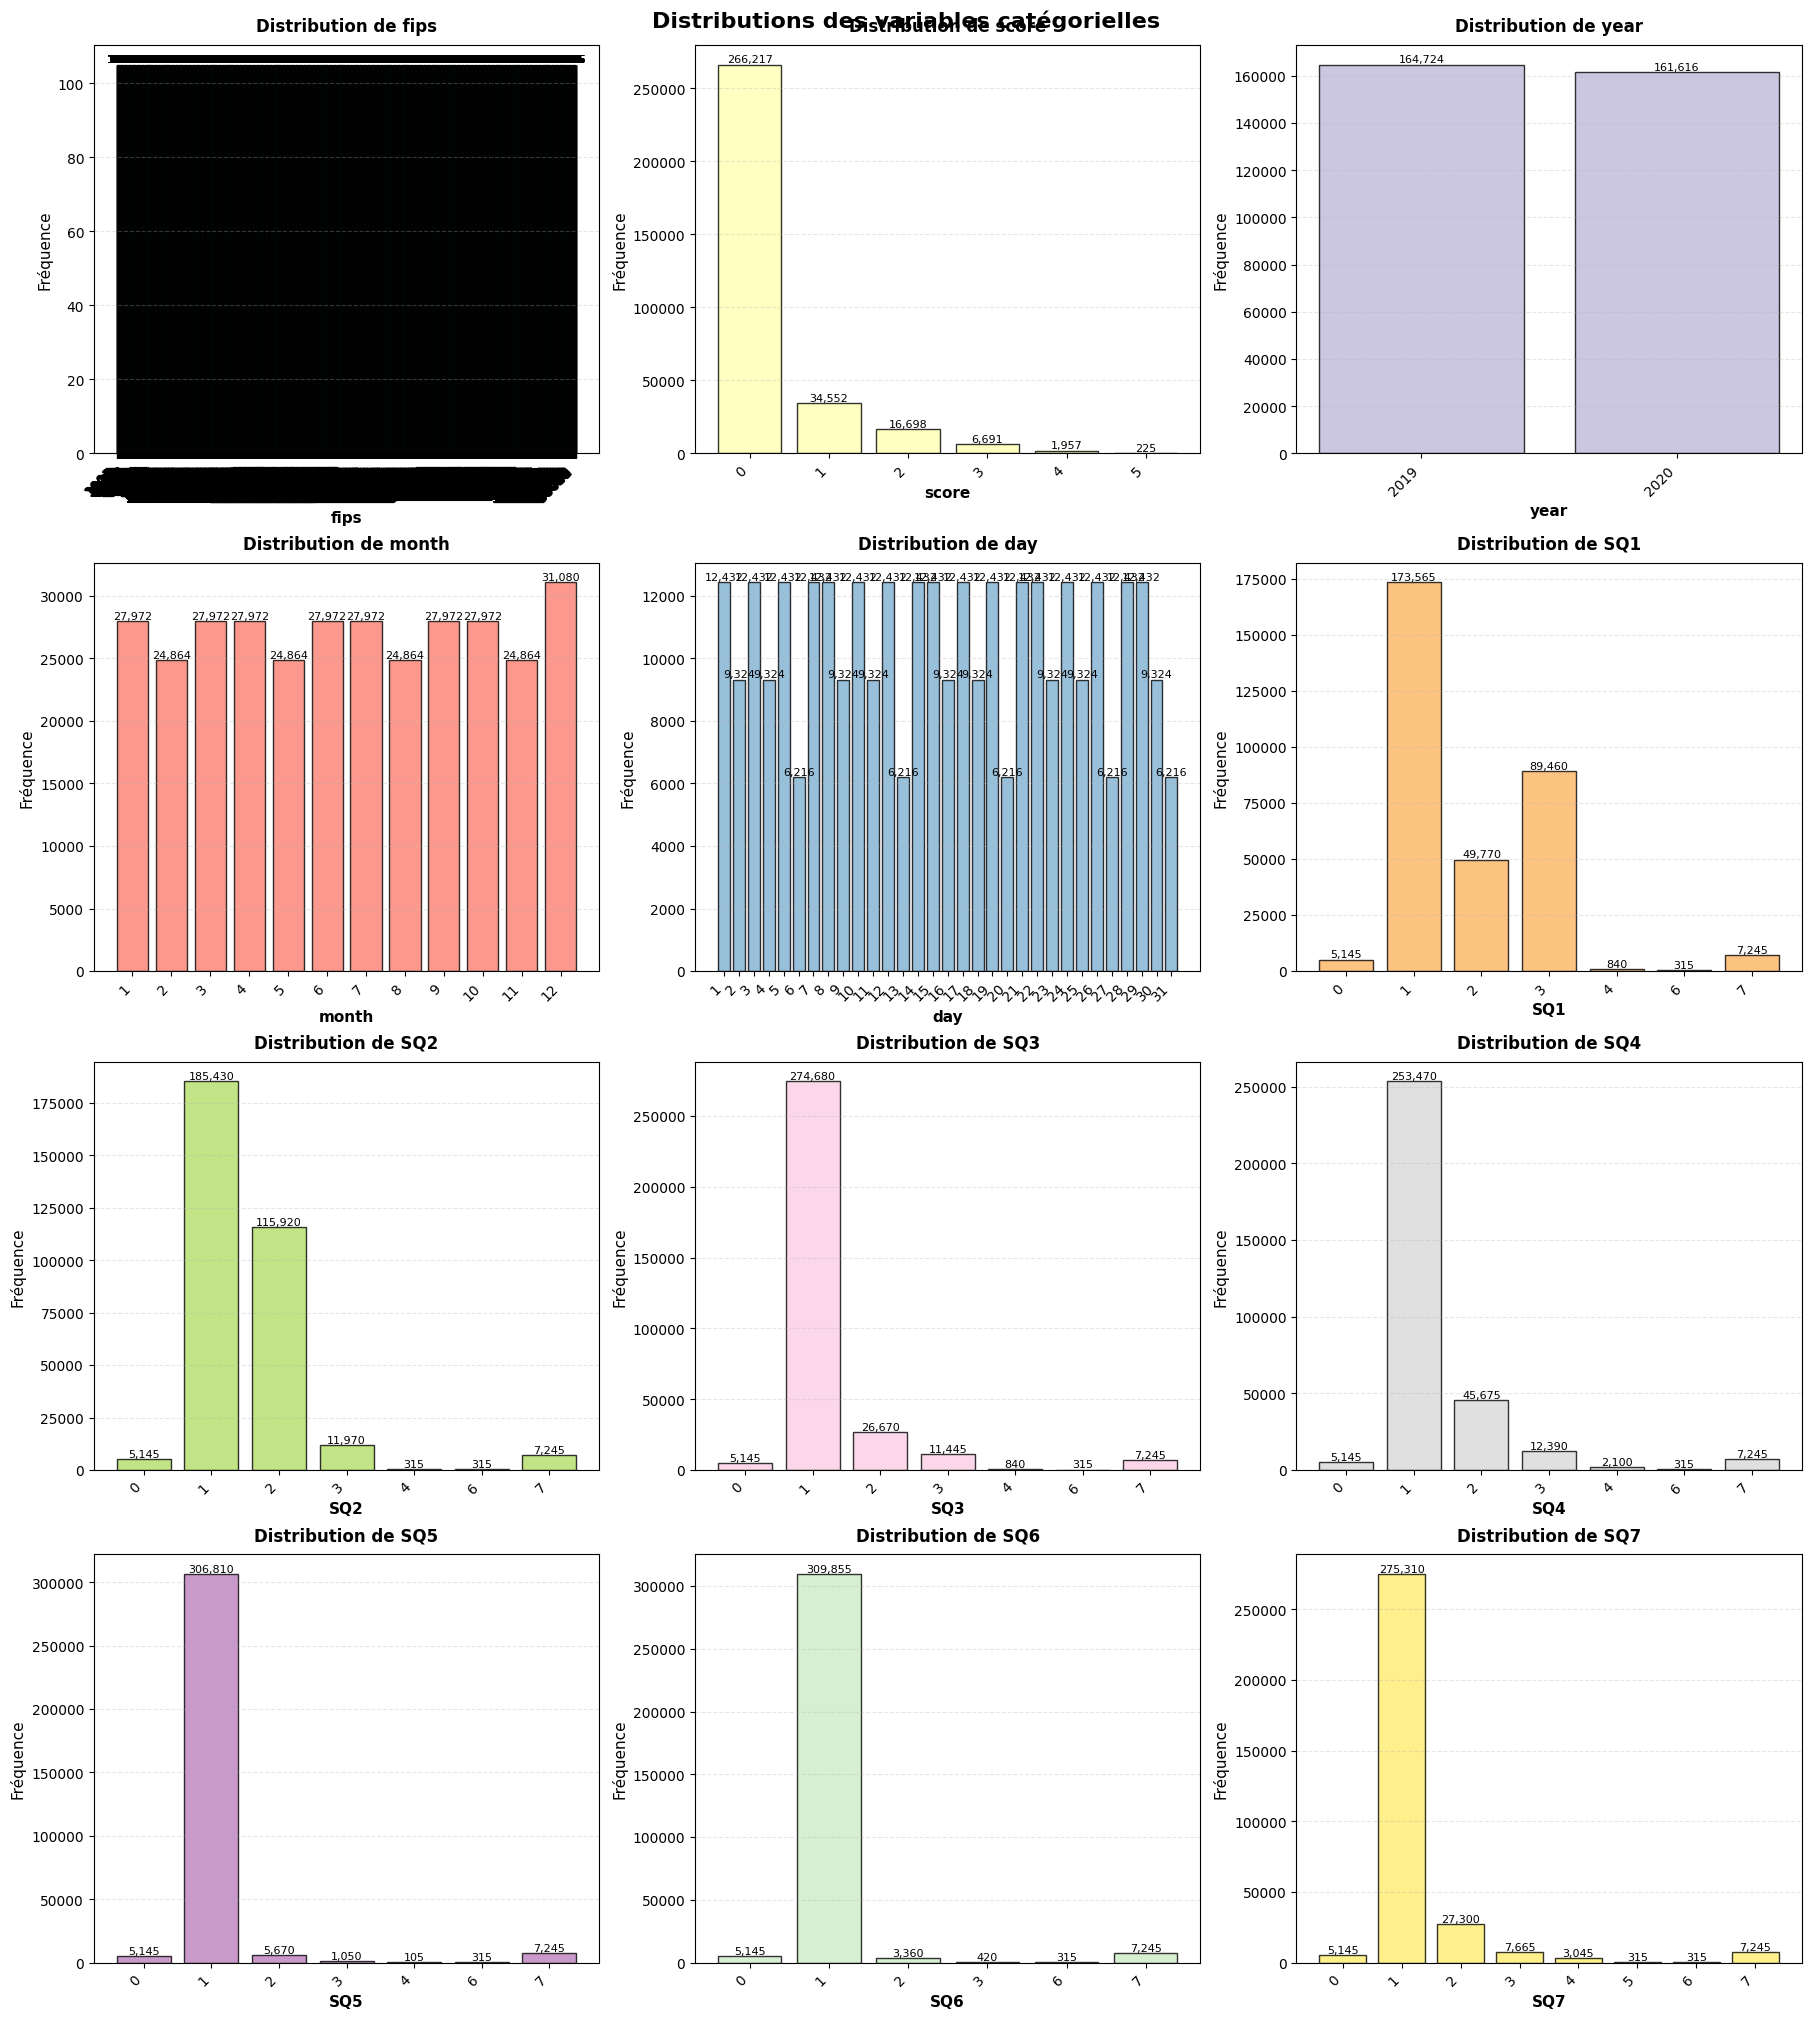

In [ ]:
X_cat = X[var_cat]
n_vars = len(var_cat)
num_cols = 3  # Nombre de graphiques par ligne
num_rows = (n_vars + num_cols - 1) // num_cols  # Nombre de lignes nécessaires

# Créer la figure avec des subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5), constrained_layout=True)
axes = axes.flatten()  # Aplatir pour faciliter l'itération

# Palette de couleurs
colors = plt.cm.Set3(np.linspace(0, 1, 12))

for i, col_name in enumerate(var_cat):
    ax = axes[i]

    # Compter les valeurs et trier
    value_counts = X_cat[col_name].value_counts().sort_index()

    # Créer le graphique en barres
    bars = ax.bar(range(len(value_counts)), value_counts.values,
                   color=colors[i % len(colors)],
                   edgecolor='black',
                   alpha=0.8)

    # Personnaliser les axes
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    ax.set_xlabel(col_name, fontsize=11, fontweight='bold')
    ax.set_ylabel('Fréquence', fontsize=11)
    ax.set_title(f'Distribution de {col_name}', fontsize=12, fontweight='bold', pad=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=8)

# Masquer les axes vides
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distributions des variables catégorielles', fontsize=16, fontweight='bold', y=1.002)
plt.show()

##Feature selection : Variabilité des caractéristiques

On mesure la variabilité des variables car cela nous donne une idée des variables qui n'apportent aucun pouvoir explicatif au modèle (les variables à faible variance).

In [ ]:
# Sélectionner uniquement les variables quantitatives (en excluant 'score' et 'fips')
quanti = [elem for elem in X.describe().columns if (elem != 'score')]
var_supp = []

# Calculer la variance de chaque variable
variances = X[quanti].var().sort_values(ascending=False)

print("Variance de chaque variable (triées par ordre décroissant) :")
print("-" * 70)
for var_name, var_value in variances.items():
    print(f"{var_name:30s} : {var_value:>15.4f}")

# Définir un seuil de variance minimale
threshold = 0.01

print(f"\n{'='*70}")
print(f"SEUIL DE VARIANCE DÉFINI : {threshold}")
print("="*70)

# Identifier les variables à faible variance
low_variance_vars = variances[variances < threshold]

if len(low_variance_vars) > 0:
    print(f"\n Variables avec variance < {threshold} (à supprimer) :")
    print("-" * 70)
    for var_name, var_value in low_variance_vars.items():
        print(f"{var_name:30s} : {var_value:>15.6f}")
        var_supp.append(var_name)

else:
    print(f"\n✓ Aucune variable avec variance < {threshold}")

# Conserver uniquement les variables avec variance suffisante
quanti_filtered = [var for var in quanti if variances[var] >= threshold]

print(f"\n{'='*70}")
print(f"RÉSULTAT DE LA SÉLECTION")
print("="*70)
print(f"Variables conservées : {len(quanti_filtered)} / {len(quanti)}")
print(f"Variables supprimées : {len(quanti) - len(quanti_filtered)}")

Variance de chaque variable (triées par ordre décroissant) :
----------------------------------------------------------------------
fips                           :  224374345.6861
elevation                      :     249928.0196
FOR_LAND                       :       1180.4962
CULT_LAND                      :       1095.2613
CULTRF_LAND                    :       1013.4957
GRS_LAND                       :        645.9523
WAT_LAND                       :        173.1637
T2M_MAX                        :        133.9988
lon                            :        131.8587
TS                             :        125.0091
T2M                            :        120.7851
T2M_MIN                        :        115.6753
T2MDEW                         :        110.7730
CULTIR_LAND                    :        105.8989
T2MWET                         :        105.2769
URB_LAND                       :         95.4644
day                            :         78.3482
NVG_LAND                       :   

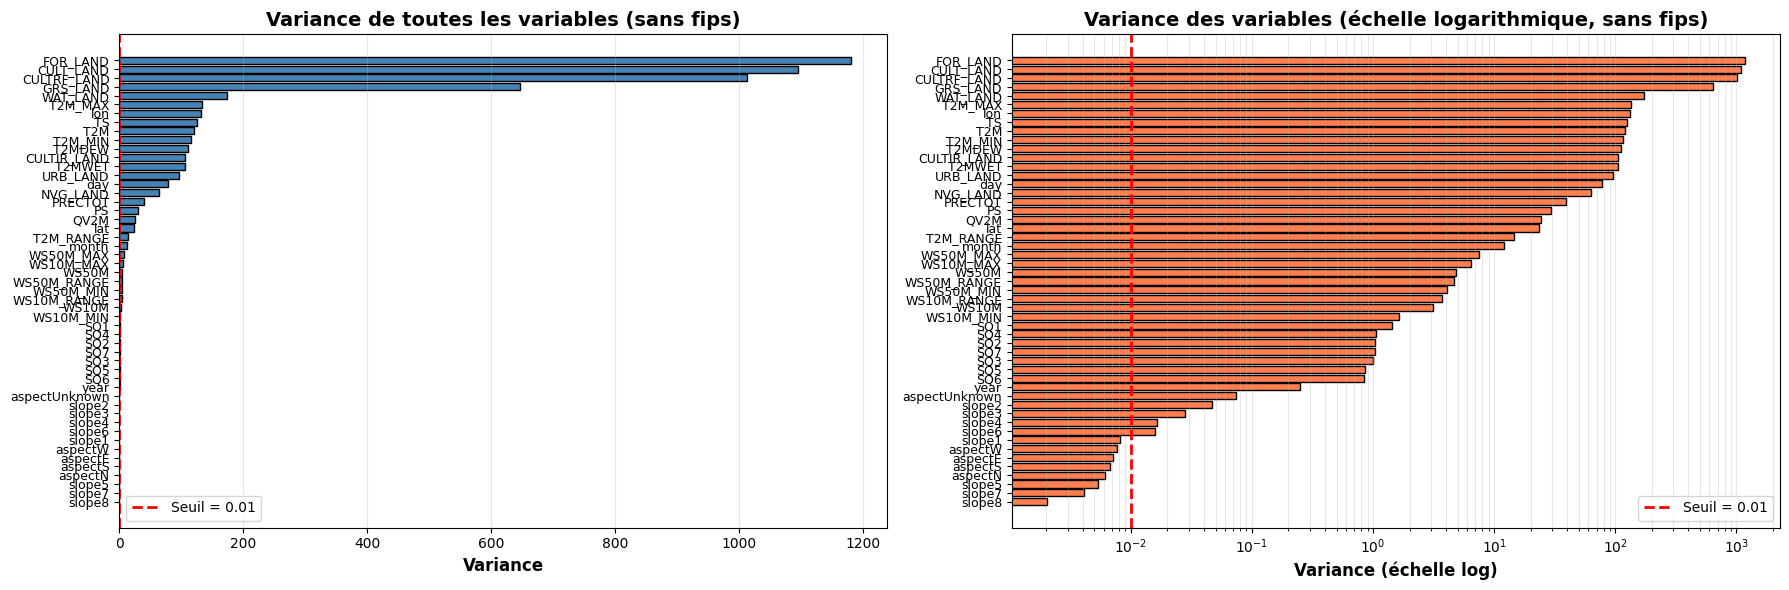

In [ ]:
# Visualisation des variances
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

quanti_ = [elem for elem in X.describe().columns if (elem != 'score')and (elem != 'fips')and (elem != 'elevation')] #Je change car fips et elevation ont une variance énorme par rapport aux autres
variances = X[quanti_].var().sort_values(ascending=False)

# Graphique 1: Toutes les variances
axes[0].barh(range(len(variances)), variances.values, color='steelblue', edgecolor='black')
axes[0].set_yticks(range(len(variances)))
axes[0].set_yticklabels(variances.index, fontsize=9)
axes[0].set_xlabel('Variance', fontsize=12, fontweight='bold')
axes[0].set_title('Variance de toutes les variables (sans fips)', fontsize=14, fontweight='bold')
axes[0].axvline(x=threshold, color='red', linestyle='--', linewidth=2, label=f'Seuil = {threshold}')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Graphique 2: Variances en échelle logarithmique (pour mieux voir les petites valeurs)
axes[1].barh(range(len(variances)), variances.values, color='coral', edgecolor='black')
axes[1].set_yticks(range(len(variances)))
axes[1].set_yticklabels(variances.index, fontsize=9)
axes[1].set_xlabel('Variance (échelle log)', fontsize=12, fontweight='bold')
axes[1].set_title('Variance des variables (échelle logarithmique, sans fips)', fontsize=14, fontweight='bold')
axes[1].set_xscale('log')
axes[1].axvline(x=threshold, color='red', linestyle='--', linewidth=2, label=f'Seuil = {threshold}')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3, which='both')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

##Feature selection : Distribution des variables en fonction du score

Ce critère nous permet de selectionner les variables qui pourraient améliorer la prédiction car on a la possibilité d'avoir des dépendance non linéaires.

/tmp/ipython-input-4050752505.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot,
/tmp/ipython-input-4050752505.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot,
/tmp/ipython-input-4050752505.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot,
/tmp/ipython-input-4050752505.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot,
/tmp/ipython-input-4050752505.py:17: MatplotlibD

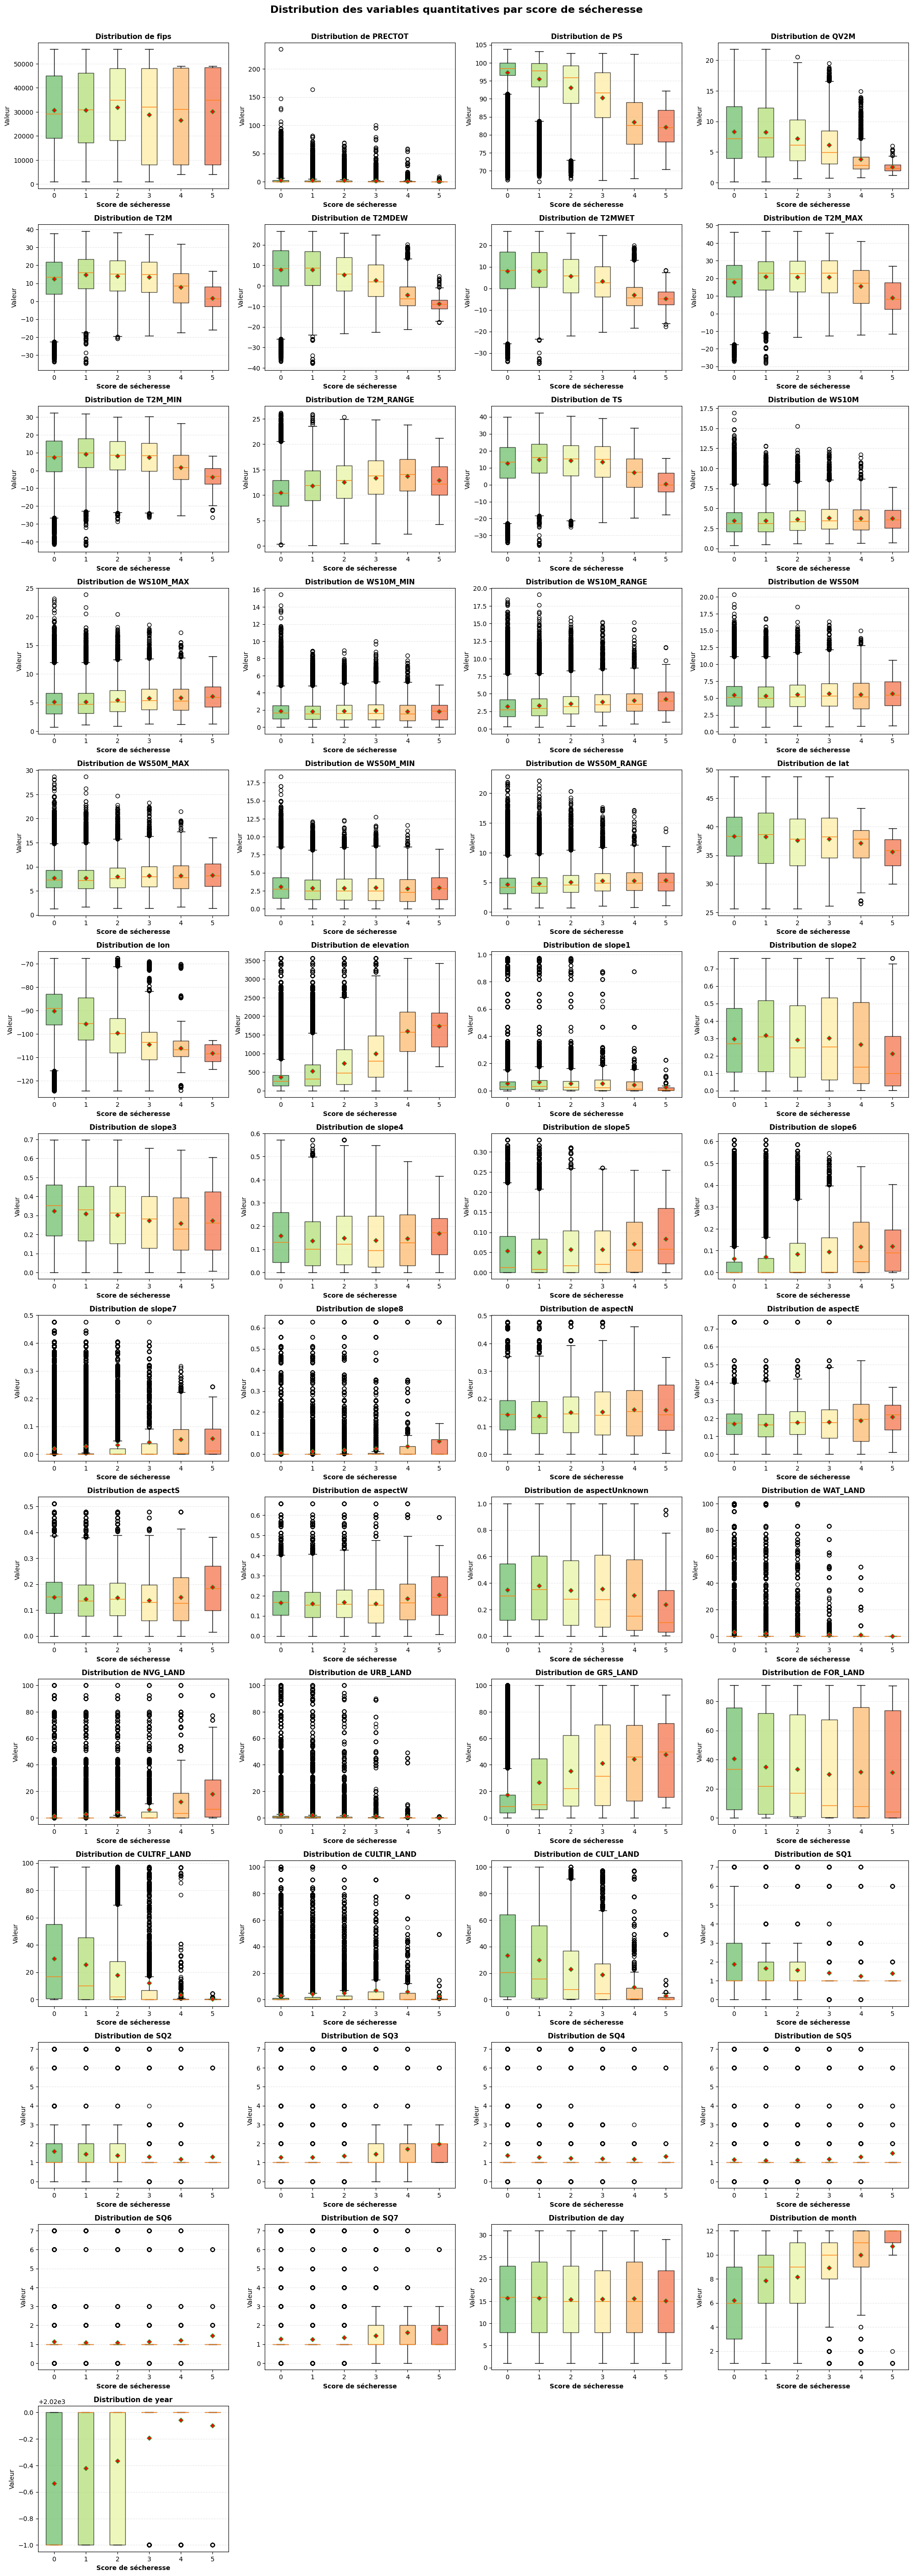

In [ ]:
# Calculer le nombre de lignes nécessaires
num_cols = 4  # Nombre de boxplots par ligne
num_rows = (len(quanti) + num_cols - 1) // num_cols

# Créer la figure avec subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()  # Aplatir pour faciliter l'itération

# Créer un boxplot pour chaque variable
for i, col in enumerate(quanti):
    ax = axes[i]

    # Créer les données pour le boxplot
    data_to_plot = [X[X['score'] == score][col].dropna() for score in sorted(X['score'].unique())]

    # Créer le boxplot
    bp = ax.boxplot(data_to_plot,
                    labels=sorted(X['score'].unique()),
                    patch_artist=True,
                    showmeans=True,
                    meanprops=dict(marker='D', markerfacecolor='red', markersize=5))

    # Colorer les boxplots
    colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(data_to_plot)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    # Personnaliser le graphique
    ax.set_xlabel('Score de sécheresse', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valeur', fontsize=10)
    ax.set_title(f'Distribution de {col}', fontsize=11, fontweight='bold')
    ax.grid(axis='y', alpha=0.3, linestyle='--')

# Masquer les axes vides
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribution des variables quantitatives par score de sécheresse',
             fontsize=16, fontweight='bold', y=1.002)
plt.tight_layout()
plt.show()

In [ ]:
X[["T2M_MAX", "T2M"]].corr()

T2M_MAX       T2M
T2M_MAX  1.000000  0.984454
T2M      0.984454  1.000000

In [ ]:
X[["T2M_MIN", "T2M"]].corr()

T2M_MIN       T2M
T2M_MIN  1.000000  0.983452
T2M      0.983452  1.000000

In [ ]:
X[["T2MDEW", "T2MWET"]].corr()

T2MDEW    T2MWET
T2MDEW  1.000000  0.998329
T2MWET  0.998329  1.000000

Les deux variables sont très corrélées, leur distribution en fonction du score sont très similaires. Pour cela on décide d'en garder une des deux pour chaque type d'indice.

In [ ]:
var_supp = ["T2M_MAX", "T2MWET", "T2M_MIN"] + var_supp

#MODELISATION MULTI-CLASSE

On rapelle à travers un graphique le déséquilibre des classes

TypeError: 'Axes' object is not subscriptable

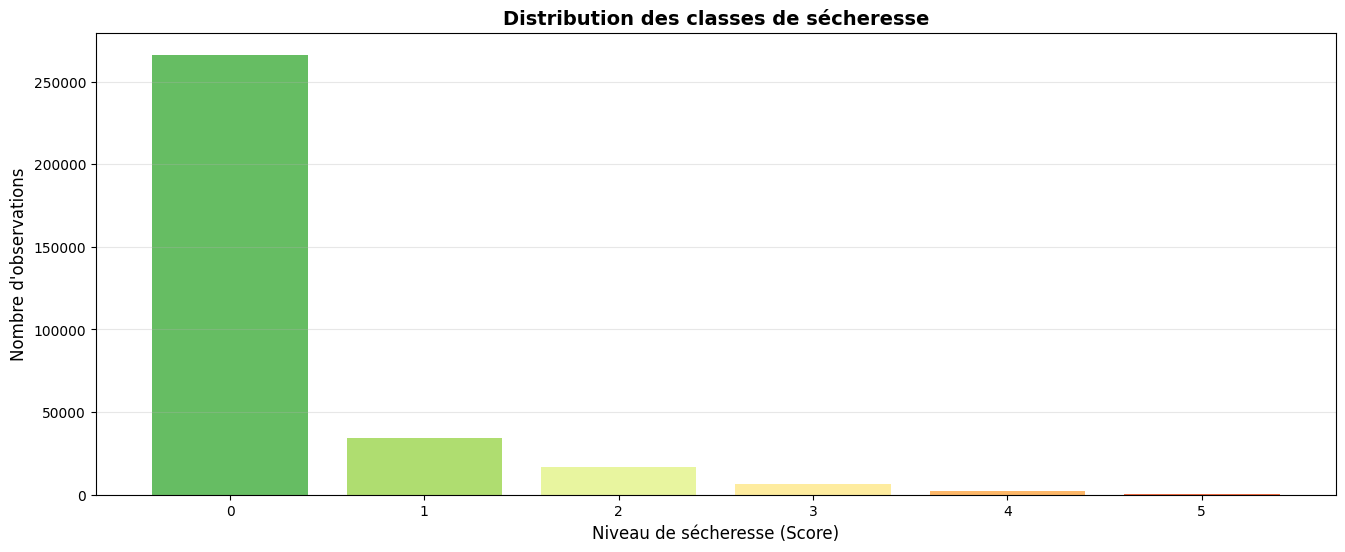

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

# Comptage par classe
score_counts = X["score"].value_counts().sort_index()
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(score_counts)))

ax.bar(score_counts.index, score_counts.values, color=colors)
ax.set_xlabel("Niveau de sécheresse (Score)", fontsize=12)
ax.set_ylabel("Nombre d'observations", fontsize=12)
ax.set_title("Distribution des classes de sécheresse", fontsize=14, fontweight="bold")
ax.grid(axis="y", alpha=0.3)

# Ajouter les valeurs sur les barres
for idx, val in score_counts.items():
    ax.text(idx, val, f"{val:,}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
df = X.drop(columns=var_supp)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df["score"], test_size=0.20, random_state=42)

On réalise le split train-test avant d'appliquer l'algorithme SMOTE afin d'éviter le DataLeakage.

In [ ]:
X_train["score"] == y_train #vérif

294559    True
24270     True
78609     True
238512    True
174372    True
          ... 
119879    True
259178    True
131932    True
146867    True
121958    True
Name: score, Length: 261072, dtype: bool

In [ ]:
X_test["score"] == y_test #vérif

212814    True
20908     True
111723    True
219392    True
16785     True
          ... 
209748    True
79927     True
129104    True
20233     True
201635    True
Name: score, Length: 65268, dtype: bool

In [ ]:
X_train = X_train.drop(columns="score")
X_test = X_test.drop(columns="score")

##RANDOM FOREST

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

Le modèle Random Forest a été choisi pour sa robustesse face au sur-apprentissage, sa capacité à capturer des relations non linéaires complexes et son excellent compromis entre performance prédictive et simplicité de mise en œuvre.

On commence par faire la prédiction sans effectuer de rééchantillonage afin de pouvoir comparer les résultat par la suite.

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,     # valeur standard et robuste
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

n_jobs : L’entraînement du modèle Random Forest a été parallélisé à l’aide du paramètre n_jobs afin d’exploiter les capacités multi-cœurs du processeur. La parallélisation a été contrôlée afin d’éviter une duplication excessive de la mémoire lors des phases de validation croisée.

max_depth : La profondeur maximale des arbres n’a pas été contrainte afin de permettre au modèle de capturer des interactions complexes entre les variables. Le risque de sur-apprentissage est limité par l’agrégation d’un grand nombre d’arbres entraînés sur des sous-échantillons aléatoires des données.

n_estimators : Le nombre d’arbres a été fixé à 300 afin d’assurer la stabilité des performances du modèle. Au-delà de ce seuil, l’augmentation du nombre d’arbres n’entraîne généralement qu’un gain marginal en performance, au prix d’un coût de calcul plus élevé.

In [ ]:
y_pred_rf = rf.predict(X_test)

print("F1 macro :", f1_score(y_test, y_pred_rf, average="macro"))
print(classification_report(y_test, y_pred_rf))

F1 macro : 0.7559767941838756
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     53199
           1       0.79      0.58      0.67      6926
           2       0.80      0.69      0.74      3349
           3       0.83      0.76      0.79      1350
           4       0.83      0.79      0.81       402
           5       0.82      0.43      0.56        42

    accuracy                           0.93     65268
   macro avg       0.84      0.70      0.76     65268
weighted avg       0.92      0.93      0.92     65268



La precision, le recall et le F1-score sont trois métriques courantes pour évaluer un modèle de classification (surtout quand les classes sont déséquilibrées).

Precision (précision) : parmi les observations que le modèle a prédites comme positives (ou comme une classe donnée), quelle proportion est vraiment correcte ? → Elle pénalise surtout les faux positifs. Exemple : si le modèle prédit 100 fois la classe A mais que 80 sont vraiment A, la précision est 0,80. Dans notre cas de base de données deséquilibrées, cette métrique n'est pas pertinente, car la classe minoritaire est celle pour laquelle il y a un coût si il existe de faux négatifs.

Recall (rappel / sensibilité) : parmi les observations vraiment positives (ou appartenant à une classe donnée), quelle proportion le modèle a réussi à retrouver ? → Il pénalise surtout les faux négatifs (le modèle “rate” des vrais cas). Exemple : s’il y a 100 vrais A dans les données et que le modèle n’en détecte que 70, le recall est 0,70.

F1-score : c’est un compromis entre precision et recall. Il correspond à leur moyenne harmonique, donc il devient faible dès que l’une des deux métriques est faible. → Utile quand on veut un modèle équilibré : ni trop de faux positifs, ni trop de faux négatifs.

En résumé : precision = qualité des prédictions, recall = capacité à retrouver tous les vrais cas, et F1-score = équilibre entre les deux.

In [ ]:
y_proba_rf = rf.predict_proba(X_test)

In [ ]:
auc_macro_ovr_rf = roc_auc_score(
    y_test,
    y_proba_rf,
    multi_class="ovr",
    average="macro"
)

print("AUC ROC macro (OvR) :", auc_macro_ovr_rf)

AUC ROC macro (OvR) : 0.9899683023938758


In [ ]:
from sklearn.metrics import roc_curve, auc

for k in range(0,6):
    y_true_bin = (y_test == k).astype(int)
    y_score_k = y_proba_rf[:, k]

    fpr, tpr, _ = roc_curve(y_true_bin, y_score_k)
    print("AUC classe", k, "=", auc(fpr, tpr))

AUC classe 0 = 0.9880540624561648
AUC classe 1 = 0.9694757313544825
AUC classe 2 = 0.9880615806206638
AUC classe 3 = 0.9954195827292608
AUC classe 4 = 0.9989246104445245
AUC classe 5 = 0.9998742467581581


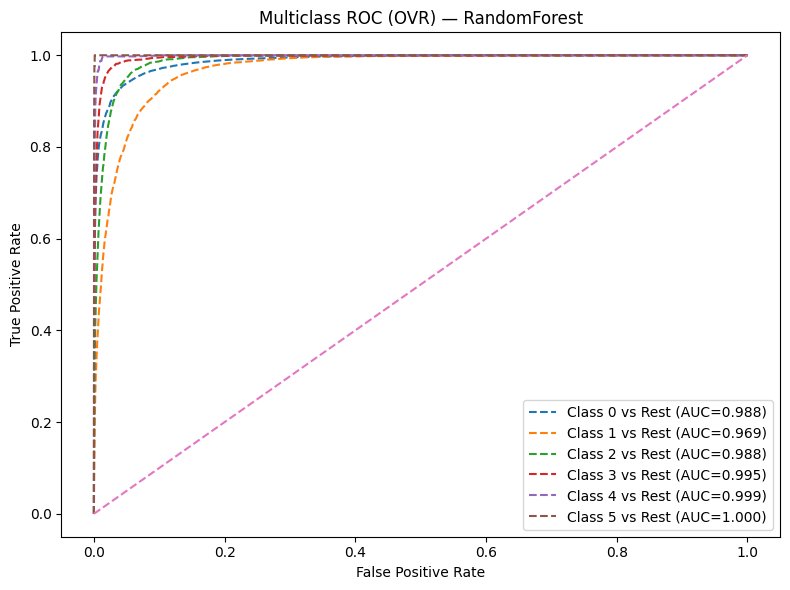

In [ ]:
# Important : ordre des classes correspondant aux colonnes
classes = rf.classes_
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(8,6))

for j, c in enumerate(classes):
    # y_true binaire pour la classe c
    y_true_bin = y_test_bin[:, j]

    # Si la classe est absente du test, ROC non définie
    if y_true_bin.sum() == 0:
        print(f"Classe {c} absente dans y_test -> ROC/AUC non définie")
        continue

    # score 1D = proba de la classe c
    y_score = y_proba_rf[:, j]

    fpr[c], tpr[c], _ = roc_curve(y_true_bin, y_score)
    roc_auc[c] = auc(fpr[c], tpr[c])

    plt.plot(fpr[c], tpr[c], linestyle="--", label=f"Class {c} vs Rest (AUC={roc_auc[c]:.3f})")

plt.plot([0,1], [0,1], linestyle="--")  # baseline
plt.title("Multiclass ROC (OVR) — RandomForest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("multiclass_roc_rf_smote_under_v2.png", dpi=300)
plt.show()


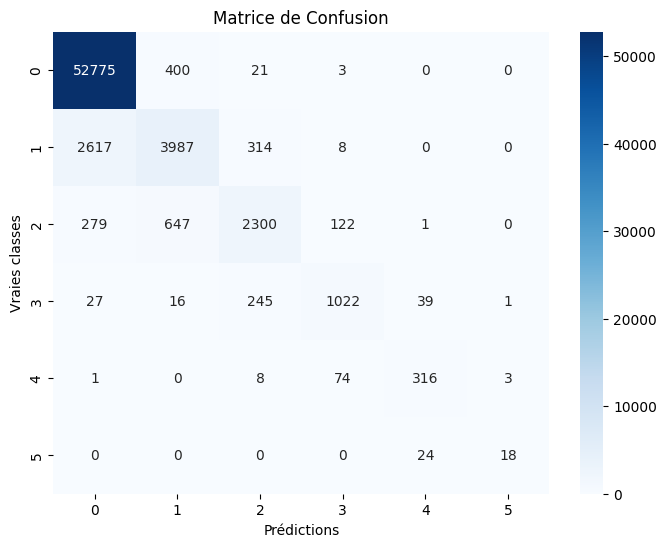

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()

##SMOTE

In [ ]:
y_train.value_counts()

score
0    213018
1     27626
2     13349
3      5341
4      1555
5       183
Name: count, dtype: int64

Constat : déséquilibre massif de la variable cible

La variable cible score est répartie de manière très inégale : la classe 0 apparaît 213 018 fois alors que la classe la plus rare (5) n’apparaît que 183 fois. Cela correspond à un rapport d’environ 1164:1 entre la classe majoritaire et la plus minoritaire.
Un tel déséquilibre est problématique car un modèle peut obtenir une bonne accuracy globale en prédisant majoritairement la classe 0, tout en échouant à détecter les classes rares (celles qui sont souvent les plus importantes). Pour limiter ce biais d’apprentissage, on met en place des stratégies de rééquilibrage sur l’échantillon d’entraînement.

Pour évaluer correctement ces stratégies en contexte déséquilibré, il est recommandé de privilégier des métriques adaptées (macro-F1, balanced accuracy, rappel/precision par classe, AUC-PR) plutôt que l’accuracy seule. Le rééchantillonnage doit être appliqué uniquement sur les données d’entraînement (idéalement au sein d’une pipeline et de la validation croisée) afin d’éviter toute fuite d’information.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Sur-échantillonner trop loin du support réel de la classe peut devenir peu crédible statistiquement. Un équilibrage partiel crédible doit rester proche de la densité réelle de chaque classe. On décide de ne pas sur-échantillonner au-delà de la classe immédiatement au-dessus. Les classes rares restent plus rares, mais moins extrêmes. Cette approche de rééquilibrage partiel améliore la capacité du modèle à “voir” suffisamment d’exemples des classes rares, sans sur-générer des données synthétiques au point de déformer fortement la distribution. De plus cela permet de réduire le coût computationnel engendré par un grand nombre de lignes.

In [ ]:
sampling_strategy = {
    0: 213018,
    1: 27626,
    2: 13349,
    3: 10000,
    4: 4000,
    5: 1000
}

In [ ]:
smote = SMOTE(
    sampling_strategy = sampling_strategy,
    random_state=42
)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(Counter(y_train_res))

Counter({0: 213018, 1: 27626, 2: 13349, 3: 10000, 4: 4000, 5: 1000})


##SMOTE BIS

In [ ]:
y_train.value_counts()

score
0    213018
1     27626
2     13349
3      5341
4      1555
5       183
Name: count, dtype: int64

Constat : déséquilibre massif de la variable cible

La variable cible score est répartie de manière très inégale : la classe 0 apparaît 213 018 fois alors que la classe la plus rare (5) n’apparaît que 183 fois. Cela correspond à un rapport d’environ 1164:1 entre la classe majoritaire et la plus minoritaire.
Un tel déséquilibre est problématique car un modèle peut obtenir une bonne accuracy globale en prédisant majoritairement la classe 0, tout en échouant à détecter les classes rares (celles qui sont souvent les plus importantes). Pour limiter ce biais d’apprentissage, on met en place des stratégies de rééquilibrage sur l’échantillon d’entraînement.

Pour évaluer correctement ces stratégies en contexte déséquilibré, il est recommandé de privilégier des métriques adaptées (macro-F1, balanced accuracy, rappel/precision par classe, AUC-PR) plutôt que l’accuracy seule. Le rééchantillonnage doit être appliqué uniquement sur les données d’entraînement (idéalement au sein d’une pipeline et de la validation croisée) afin d’éviter toute fuite d’information.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Sur-échantillonner trop loin du support réel de la classe peut devenir peu crédible statistiquement. Un équilibrage partiel crédible doit rester proche de la densité réelle de chaque classe. On décide de ne pas sur-échantillonner au-delà de la classe immédiatement au-dessus. Les classes rares restent plus rares, mais moins extrêmes. Cette approche de rééquilibrage partiel améliore la capacité du modèle à “voir” suffisamment d’exemples des classes rares, sans sur-générer des données synthétiques au point de déformer fortement la distribution. De plus cela permet de réduire le coût computationnel engendré par un grand nombre de lignes.

In [ ]:
sampling_strategy_bis = {
    0: 213018,
    1: 27626,
    2: 13349,
    3: 13000,
    4: 5000,
    5: 1000
}

In [ ]:
smote_bis = SMOTE(
    sampling_strategy = sampling_strategy_bis,
    random_state=42
)

X_train_res_bis, y_train_res_bis = smote.fit_resample(X_train, y_train)
print(Counter(y_train_res))

##RANDOM FOREST SMOTE

In [ ]:
rf_res = RandomForestClassifier(
    n_estimators=300,     # valeur standard et robuste
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_res.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf_res = rf_res.predict(X_test)

print("F1 macro :", f1_score(y_test, y_pred_rf_res, average="macro"))
print(classification_report(y_test, y_pred_rf_res))

F1 macro : 0.786655603717373
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     53199
           1       0.79      0.57      0.66      6926
           2       0.80      0.67      0.73      3349
           3       0.79      0.80      0.80      1350
           4       0.84      0.81      0.83       402
           5       0.74      0.74      0.74        42

    accuracy                           0.93     65268
   macro avg       0.82      0.76      0.79     65268
weighted avg       0.92      0.93      0.92     65268



In [ ]:
y_proba_rf_res = rf_res.predict_proba(X_test)

In [ ]:
auc_macro_ovr_res = roc_auc_score(
    y_test,
    y_proba_rf_res,
    multi_class="ovr",
    average="macro"
)

print("AUC ROC macro (OvR) :", auc_macro_ovr_res)

AUC ROC macro (OvR) : 0.9900053611885035


In [ ]:
from sklearn.metrics import roc_curve, auc

for k in range(0,6):
    y_true_bin = (y_test == k).astype(int)
    y_score_k = y_proba_rf_res[:, k]

    fpr, tpr, _ = roc_curve(y_true_bin, y_score_k)
    print("AUC classe", k, "=", auc(fpr, tpr))

AUC classe 0 = 0.9879070634427678
AUC classe 1 = 0.9694647272552904
AUC classe 2 = 0.9881436718988448
AUC classe 3 = 0.995645815877519
AUC classe 4 = 0.9990544993406231
AUC classe 5 = 0.9998163893159753


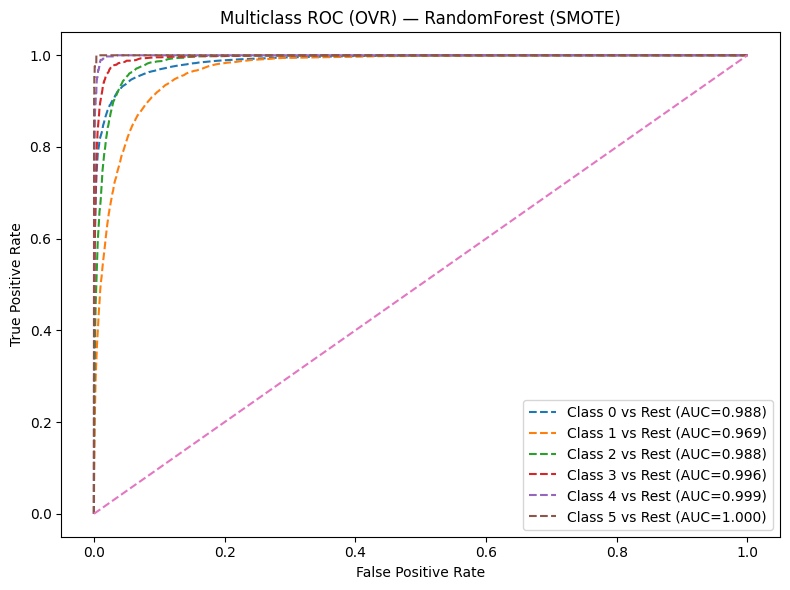

In [ ]:
# Probabilités (n_samples, n_classes)
y_proba_rf_res = rf_res.predict_proba(X_test)

# Important : ordre des classes correspondant aux colonnes
classes = rf_res.classes_
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(8,6))

for j, c in enumerate(classes):
    # y_true binaire pour la classe c
    y_true_bin = y_test_bin[:, j]

    # Si la classe est absente du test, ROC non définie
    if y_true_bin.sum() == 0:
        print(f"Classe {c} absente dans y_test -> ROC/AUC non définie")
        continue

    # score 1D = proba de la classe c
    y_score = y_proba_rf_res[:, j]

    fpr[c], tpr[c], _ = roc_curve(y_true_bin, y_score)
    roc_auc[c] = auc(fpr[c], tpr[c])

    plt.plot(fpr[c], tpr[c], linestyle="--", label=f"Class {c} vs Rest (AUC={roc_auc[c]:.3f})")

plt.plot([0,1], [0,1], linestyle="--")  # baseline
plt.title("Multiclass ROC (OVR) — RandomForest (SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("multiclass_roc_rf_smote_under_v2.png", dpi=300)
plt.show()


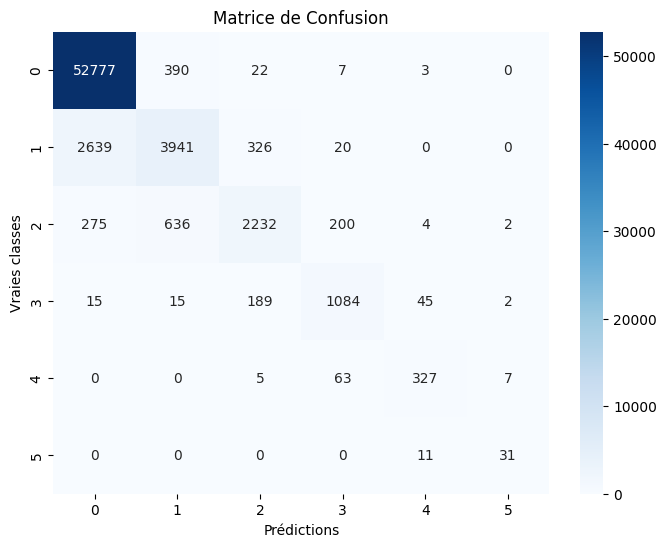

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_res)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()

##RANDOM FOREST SMOTE BIS

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

In [ ]:
rf_res_bis = RandomForestClassifier(
    n_estimators=300,     # valeur standard et robuste
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_res_bis.fit(X_train_res_bis, y_train_res_bis)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf_res_bis = rf_res_bis.predict(X_test)

print("F1 macro :", f1_score(y_test, y_pred_rf_res_bis, average="macro"))
print(classification_report(y_test, y_pred_rf_res_bis))

F1 macro : 0.786655603717373
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     53199
           1       0.79      0.57      0.66      6926
           2       0.80      0.67      0.73      3349
           3       0.79      0.80      0.80      1350
           4       0.84      0.81      0.83       402
           5       0.74      0.74      0.74        42

    accuracy                           0.93     65268
   macro avg       0.82      0.76      0.79     65268
weighted avg       0.92      0.93      0.92     65268



In [ ]:
y_proba_rf_res_bis = rf_res_bis.predict_proba(X_test)

In [ ]:
auc_macro_ovr_res_bis = roc_auc_score(
    y_test,
    y_proba_rf_res_bis,
    multi_class="ovr",
    average="macro"
)

print("AUC ROC macro (OvR) :", auc_macro_ovr_res_bis)

AUC ROC macro (OvR) : 0.9900053611885035


In [ ]:
from sklearn.metrics import roc_curve, auc

for k in range(0,6):
    y_true_bin_bis = (y_test == k).astype(int)
    y_score_k_bis = y_proba_rf_res_bis[:, k]

    fpr, tpr, _ = roc_curve(y_true_bin_bis, y_score_k_bis)
    print("AUC classe", k, "=", auc(fpr, tpr))

AUC classe 0 = 0.9879070634427678
AUC classe 1 = 0.9694647272552904
AUC classe 2 = 0.9881436718988448
AUC classe 3 = 0.995645815877519
AUC classe 4 = 0.9990544993406231
AUC classe 5 = 0.9998163893159753


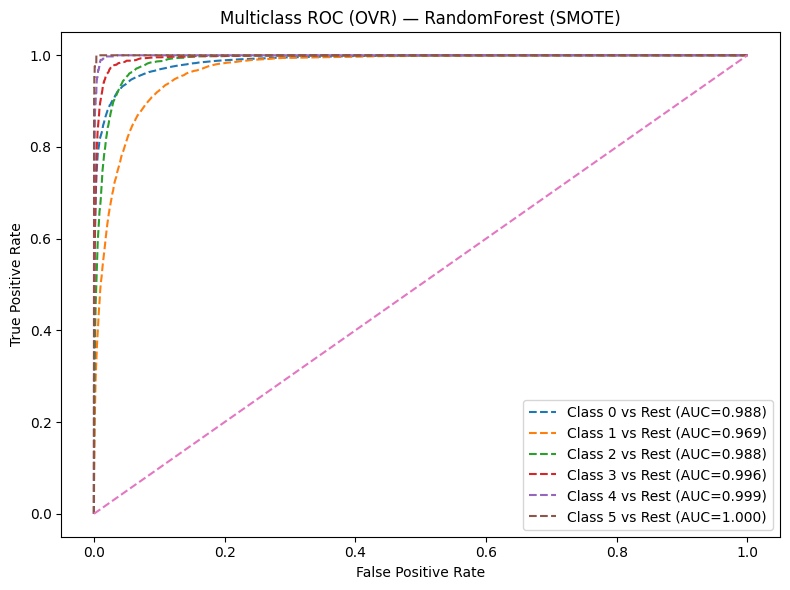

In [ ]:
# Probabilités (n_samples, n_classes)
y_proba_rf_res_bis = rf_res_bis.predict_proba(X_test)

# Important : ordre des classes correspondant aux colonnes
classes = rf_res_bis.classes_
y_test_bin_bis = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(8,6))

for j, c in enumerate(classes):
    # y_true binaire pour la classe c
    y_true_bin_bis = y_test_bin_bis[:, j]

    # Si la classe est absente du test, ROC non définie
    if y_true_bin_bis.sum() == 0:
        print(f"Classe {c} absente dans y_test -> ROC/AUC non définie")
        continue

    # score 1D = proba de la classe c
    y_score_bis = y_proba_rf_res_bis[:, j]

    fpr[c], tpr[c], _ = roc_curve(y_true_bin_bis, y_score_bis)
    roc_auc[c] = auc(fpr[c], tpr[c])

    plt.plot(fpr[c], tpr[c], linestyle="--", label=f"Class {c} vs Rest (AUC={roc_auc[c]:.3f})")

plt.plot([0,1], [0,1], linestyle="--")  # baseline
plt.title("Multiclass ROC (OVR) — RandomForest (SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("multiclass_roc_rf_smote_under_v2.png", dpi=300)
plt.show()


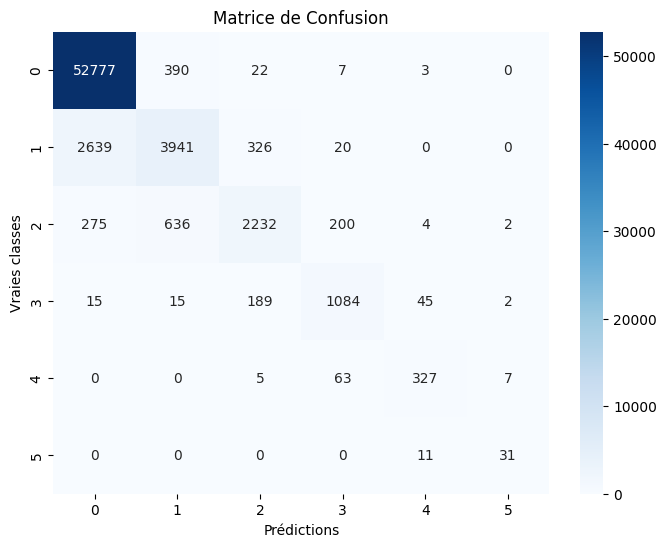

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_res_bis)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()

##RANDOM FOREST : SMOTE + UNDERSAMPLING

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
# 1) SMOTE : on fixe un nombre cible par classe (dict = multiclass)
smote_strategy = {
    2: 20000,
    3: 20000,
    4: 20000,
    5: 5000
}

# 2) Under-sampling : on fixe des tailles finales par classe
under_strategy = {
    0: 60000,
    1: 27626,
    2: 20000,
    3: 20000,
    4: 20000,
    5: 5000
}

resampler = Pipeline(steps=[
    ("smote", SMOTE(sampling_strategy=smote_strategy, k_neighbors=5, random_state=42)),
    ("under", RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)),
])

X_train_res_v2, y_train_res_v2 = resampler.fit_resample(X_train, y_train)

Cette stratégie combine : SMOTE pour augmenter les classes rares, RandomUnderSampler pour réduire le poids écrasant de la classe majoritaire.

L’idée est d’obtenir un dataset final plus équilibré tout en maîtrisant la taille du jeu d’entraînement (moins de coût de calcul et moins de domination de la classe 0).

Le choix :

smote_strategy = {2: 20000, 3: 20000, 4: 20000, 5: 5000}


signifie qu’on renforce surtout les classes les plus déficitaires (2, 3, 4 et 5).
Le fait de ne pas sur-échantillonner la classe 1 ici peut se justifier par un compromis : elle est déjà beaucoup plus représentée que 3–5, et la sur-génération sur toutes les classes minoritaires peut augmenter la part de synthétique et le bruit.

20/5 = 4
4/1 = 4

On réduit fortement la classe 0 (de 213k à 60k) pour limiter son influence, tout en conservant un nombre significatif d’observations majoritaires (on ne “jette” pas tout).
Résultat attendu : meilleure capacité à apprendre les classes rares, avec un compromis raisonnable entre information conservée (majoritaire) et réduction du biais.

L’usage d’une Pipeline garantit que SMOTE puis l’undersampling sont appliqués dans le bon ordre et surtout de manière propre (notamment si on fait de la cross-validation ensuite). C’est une bonne pratique pour éviter des erreurs de manipulation et réduire le risque de fuite d’information.

In [ ]:
rf_res_v2 = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_res_v2.fit(X_train_res_v2, y_train_res_v2)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf_res_v2 = rf_res_v2.predict(X_test)

print("Classification Report for Random Forest (Multiclass with SMOTE):\n")
print(classification_report(y_test, y_pred_rf_res_v2, zero_division=0))

Classification Report for Random Forest (Multiclass with SMOTE):

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     53199
           1       0.63      0.78      0.70      6926
           2       0.72      0.71      0.72      3349
           3       0.72      0.81      0.76      1350
           4       0.80      0.84      0.82       402
           5       0.85      0.81      0.83        42

    accuracy                           0.91     65268
   macro avg       0.78      0.82      0.80     65268
weighted avg       0.92      0.91      0.92     65268



In [ ]:
y_proba_rf_res_v2 = rf_res_v2.predict_proba(X_test)
print(y_proba_rf_res_v2.shape)  # doit afficher (n_samples, 6)

(65268, 6)


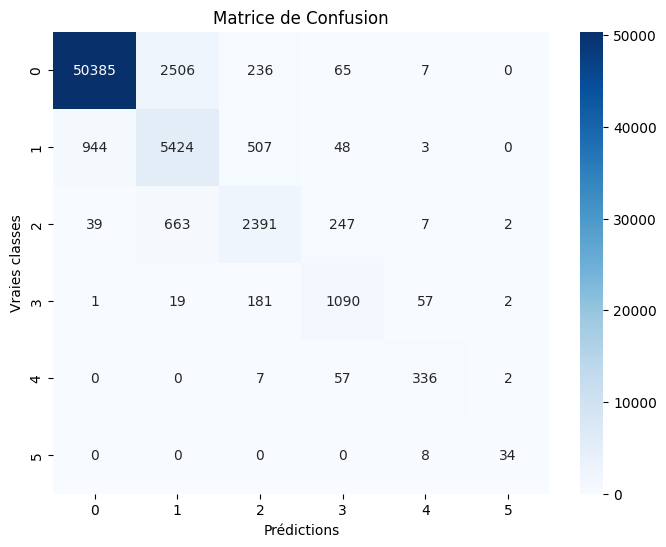

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_res_v2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()

In [ ]:
auc_macro_ovr_res_v2 = roc_auc_score(y_test, y_proba_rf_res_v2, multi_class="ovr", average="macro")
print("AUC macro OVR =", auc_macro_ovr_res_v2)

AUC macro OVR = 0.9862173516636586


In [ ]:
from sklearn.metrics import roc_curve, auc

for k in range(0,6):
    y_true_bin = (y_test == k).astype(int)
    y_score_k = y_proba_rf_res_v2[:, k]

    fpr, tpr, _ = roc_curve(y_true_bin, y_score_k)
    print("AUC classe", k, "=", auc(fpr, tpr))

AUC classe 0 = 0.9821625912910451
AUC classe 1 = 0.9587274808713786
AUC classe 2 = 0.9840499993222153
AUC classe 3 = 0.9941930807180033
AUC classe 4 = 0.9983102171748479
AUC classe 5 = 0.9998607406044624


L'AUC de la classe minoritaire (5) est meilleur lorsqu'on compare SMOTE et SMOTE+UNDERSAM

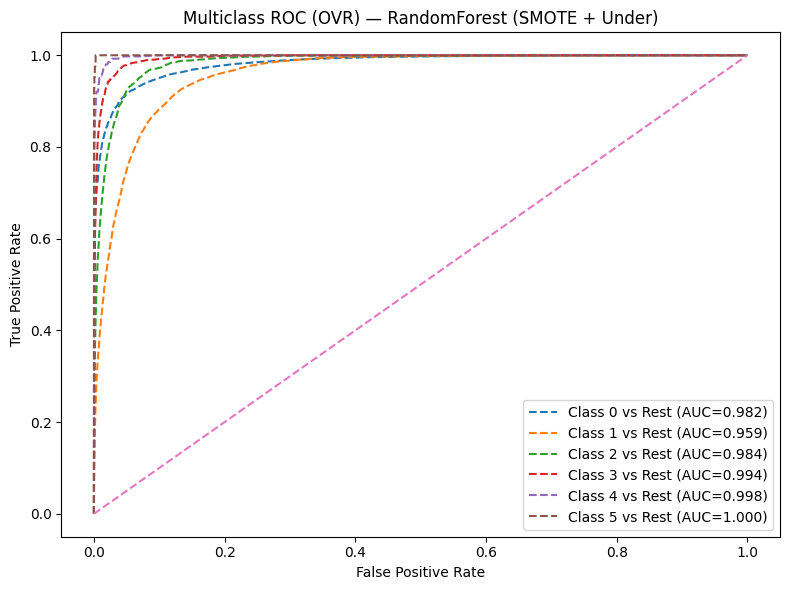

In [ ]:
# Important : ordre des classes correspondant aux colonnes
classes = rf_res_v2.classes_
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(8,6))

for j, c in enumerate(classes):
    # y_true binaire pour la classe c
    y_true_bin = y_test_bin[:, j]

    # Si la classe est absente du test, ROC non définie
    if y_true_bin.sum() == 0:
        print(f"Classe {c} absente dans y_test -> ROC/AUC non définie")
        continue

    # score 1D = proba de la classe c
    y_score = y_proba_rf_res_v2[:, j]

    fpr[c], tpr[c], _ = roc_curve(y_true_bin, y_score)
    roc_auc[c] = auc(fpr[c], tpr[c])

    plt.plot(fpr[c], tpr[c], linestyle="--", label=f"Class {c} vs Rest (AUC={roc_auc[c]:.3f})")

plt.plot([0,1], [0,1], linestyle="--")  # baseline
plt.title("Multiclass ROC (OVR) — RandomForest (SMOTE + Under)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("multiclass_roc_rf_smote_under_v2.png", dpi=300)
plt.show()


##RANDOM FOREST : SMOTE + UNDERSAMPLING BIS

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
# 1) SMOTE : on fixe un nombre cible par classe (dict = multiclass)
smote_strategy_bis = {
    2: 13339,
    3: 13000,
    4: 5000,
    5: 1000
}

# 2) Under-sampling : on fixe des tailles finales par classe
under_strategy_bis = {
    0: 100000,
    1: 27626,
    2: 13339,
    3: 13000,
    4: 5000,
    5: 1000
}

resampler_bis = Pipeline(steps=[
    ("smote", SMOTE(sampling_strategy=smote_strategy_bis, k_neighbors=5, random_state=42)),
    ("under", RandomUnderSampler(sampling_strategy=under_strategy_bis, random_state=42)),
])

X_train_res_v2_bis, y_train_res_v2_bis = resampler_bis.fit_resample(X_train, y_train)

Cette stratégie combine : SMOTE pour augmenter les classes rares, RandomUnderSampler pour réduire le poids écrasant de la classe majoritaire.

L’idée est d’obtenir un dataset final plus équilibré tout en maîtrisant la taille du jeu d’entraînement (moins de coût de calcul et moins de domination de la classe 0).

Le choix :

smote_strategy = {2: 20000, 3: 20000, 4: 20000, 5: 5000}


signifie qu’on renforce surtout les classes les plus déficitaires (2, 3, 4 et 5).
Le fait de ne pas sur-échantillonner la classe 1 ici peut se justifier par un compromis : elle est déjà beaucoup plus représentée que 3–5, et la sur-génération sur toutes les classes minoritaires peut augmenter la part de synthétique et le bruit.

20/5 = 4
4/1 = 4

On réduit fortement la classe 0 (de 213k à 60k) pour limiter son influence, tout en conservant un nombre significatif d’observations majoritaires (on ne “jette” pas tout).
Résultat attendu : meilleure capacité à apprendre les classes rares, avec un compromis raisonnable entre information conservée (majoritaire) et réduction du biais.

L’usage d’une Pipeline garantit que SMOTE puis l’undersampling sont appliqués dans le bon ordre et surtout de manière propre (notamment si on fait de la cross-validation ensuite). C’est une bonne pratique pour éviter des erreurs de manipulation et réduire le risque de fuite d’information.

In [ ]:
rf_res_v2_bis = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_res_v2_bis.fit(X_train_res_v2_bis, y_train_res_v2_bis)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf_res_v2_bis = rf_res_v2_bis.predict(X_test)

print("Classification Report for Random Forest (Multiclass with SMOTE):\n")
print(classification_report(y_test, y_pred_rf_res_v2_bis, zero_division=0))

Classification Report for Random Forest (Multiclass with SMOTE):

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     53199
           1       0.63      0.78      0.70      6926
           2       0.72      0.71      0.72      3349
           3       0.72      0.81      0.76      1350
           4       0.80      0.84      0.82       402
           5       0.85      0.81      0.83        42

    accuracy                           0.91     65268
   macro avg       0.78      0.82      0.80     65268
weighted avg       0.92      0.91      0.92     65268



In [ ]:
y_proba_rf_res_v2_bis = rf_res_v2_bis.predict_proba(X_test)
print(y_proba_rf_res_v2_bis.shape)  # doit afficher (n_samples, 6)

(65268, 6)


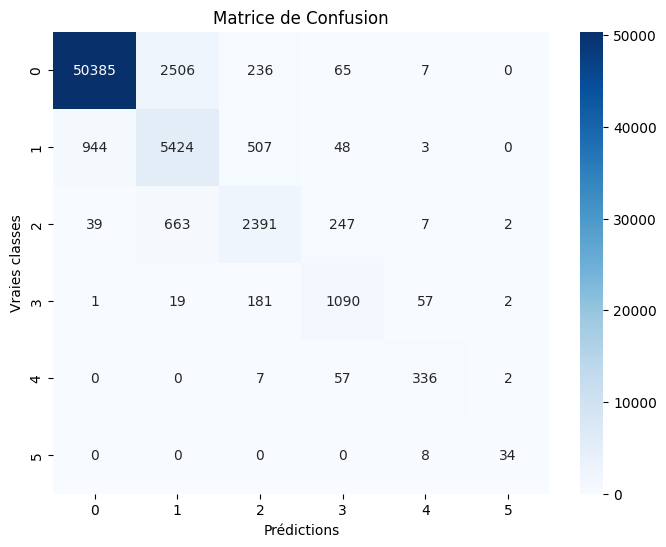

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_res_v2_bis)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()

In [ ]:
auc_macro_ovr_res_v2_bis = roc_auc_score(y_test, y_proba_rf_res_v2_bis, multi_class="ovr", average="macro")
print("AUC macro OVR =", auc_macro_ovr_res_v2_bis)

AUC macro OVR = 0.9862173516636586


In [ ]:
from sklearn.metrics import roc_curve, auc

for k in range(0,6):
    y_true_bin_bis = (y_test == k).astype(int)
    y_score_k_bis = y_proba_rf_res_v2_bis[:, k]

    fpr, tpr, _ = roc_curve(y_true_bin_bis, y_score_k_bis)
    print("AUC classe", k, "=", auc(fpr, tpr))

AUC classe 0 = 0.9821625912910451
AUC classe 1 = 0.9587274808713786
AUC classe 2 = 0.9840499993222153
AUC classe 3 = 0.9941930807180033
AUC classe 4 = 0.9983102171748479
AUC classe 5 = 0.9998607406044624


L'AUC de la classe minoritaire (5) est meilleur lorsqu'on compare SMOTE et SMOTE+UNDERSAM

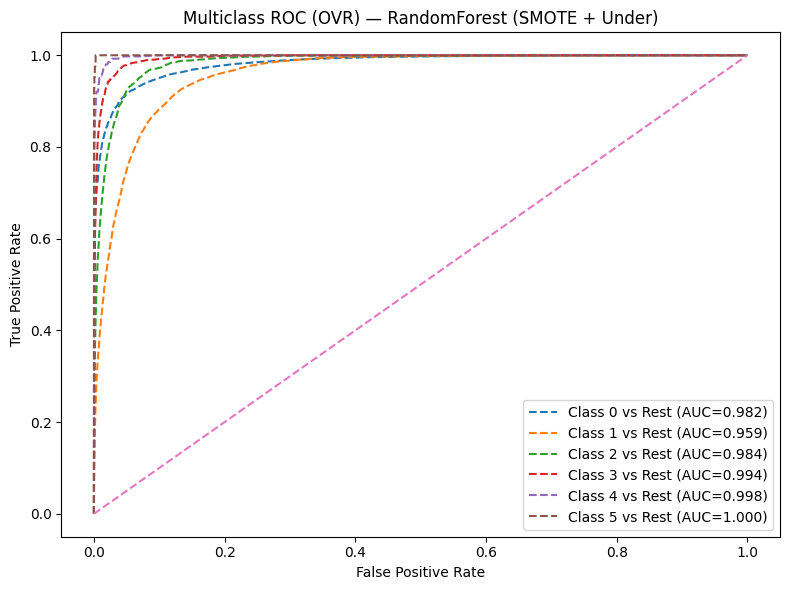

In [ ]:
# Important : ordre des classes correspondant aux colonnes
classes = rf_res_v2_bis.classes_
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(8,6))

for j, c in enumerate(classes):
    # y_true binaire pour la classe c
    y_true_bin = y_test_bin[:, j]

    # Si la classe est absente du test, ROC non définie
    if y_true_bin.sum() == 0:
        print(f"Classe {c} absente dans y_test -> ROC/AUC non définie")
        continue

    # score 1D = proba de la classe c
    y_score_bis = y_proba_rf_res_v2_bis[:, j]

    fpr[c], tpr[c], _ = roc_curve(y_true_bin, y_score_bis)
    roc_auc[c] = auc(fpr[c], tpr[c])

    plt.plot(fpr[c], tpr[c], linestyle="--", label=f"Class {c} vs Rest (AUC={roc_auc[c]:.3f})")

plt.plot([0,1], [0,1], linestyle="--")  # baseline
plt.title("Multiclass ROC (OVR) — RandomForest (SMOTE + Under)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("multiclass_roc_rf_smote_under_v2.png", dpi=300)
plt.show()


##RANDOM FOREST : SMOTE + UNDERSAMPLING V2

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, precision_recall_fscore_support,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
smote_strategy = {1: 30000, 2: 30000, 3: 30000, 4: 30000, 5: 30000}
under_strategy = {0: 60000, 1: 30000, 2: 30000, 3: 30000, 4: 30000, 5: 30000}

Ici, on force davantage la présence des classes minoritaires :

SMOTE met toutes les classes 1 à 5 à 30 000, puis on fixe la classe 0 à 60 000.

Cela revient à obtenir une distribution où la classe 0 reste majoritaire mais seulement dans un rapport 2:1 par rapport aux autres classes, au lieu d’un déséquilibre extrême.

Pourquoi tester une version plus agressive ?
Quand les classes rares sont très minoritaires, un rééquilibrage modéré peut ne pas suffire : le modèle peut encore privilégier la classe majoritaire. Cette version augmente fortement la “visibilité” des classes 1–5 pendant l’apprentissage.

Compromis attendu : Meilleure sensibilité sur classes rares, risque accru de déformation de la distribution et d’introduction de bruit synthétique, surtout si les variables ne se prêtent pas bien à l’interpolation (fort non-linéaire, variables catégorielles, distributions très multimodales).

Toutes les classes augmentée au même niveau, sauf la classe majoritaire qui est réduite.

In [ ]:
clf = RandomForestClassifier(n_estimators = 300, random_state=42, n_jobs=-1)

pipe = Pipeline(steps=[
    ("smote", SMOTE(sampling_strategy=smote_strategy, k_neighbors=5, random_state=42)),
    ("under", RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)),
    ("model", clf)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="f1_macro")
print(scores.mean(), scores.std())

0.7574804161602968 0.00887263442074594


In [ ]:
pipe.fit(X_train, y_train)
y_pred_rf_res_v3 = pipe.predict(X_test)
print(classification_report(y_test, y_pred_rf_res_v3, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     53199
           1       0.62      0.77      0.69      6926
           2       0.66      0.75      0.70      3349
           3       0.69      0.81      0.75      1350
           4       0.79      0.81      0.80       402
           5       0.80      0.83      0.81        42

    accuracy                           0.91     65268
   macro avg       0.76      0.82      0.79     65268
weighted avg       0.92      0.91      0.91     65268



In [ ]:
y_proba_rf_res_v3 = pipe.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

for k in range(0,6):
    y_true_bin = (y_test == k).astype(int)
    y_score_k = y_proba_rf_res_v3[:, k]

    fpr, tpr, _ = roc_curve(y_true_bin, y_score_k)
    print("AUC classe", k, "=", auc(fpr, tpr))

AUC classe 0 = 0.980393517146954
AUC classe 1 = 0.9546803159831847
AUC classe 2 = 0.9816720117944088
AUC classe 3 = 0.9931439529582463
AUC classe 4 = 0.9964261762442375
AUC classe 5 = 0.9996628937043803


In [ ]:
auc_macro_rf_res_v3 = roc_auc_score(y_test, y_proba_rf_res_v3,  multi_class="ovr", average="macro")
print("AUC macro:", round(auc_macro_rf_res_v3, 3))

AUC macro: 0.984


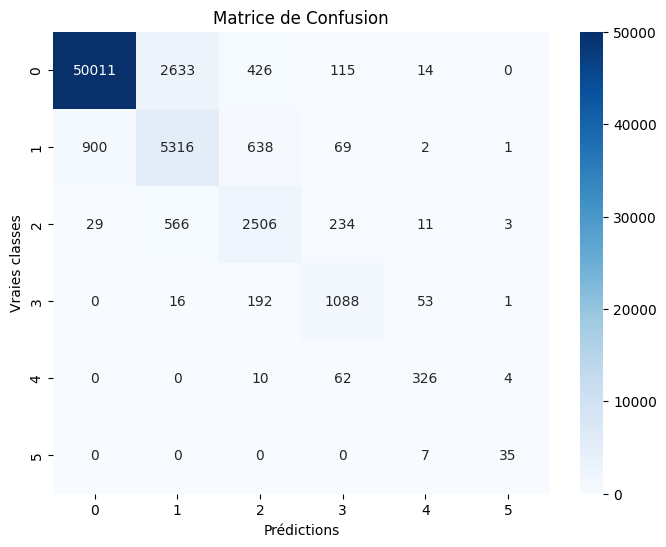

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_res_v3)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()

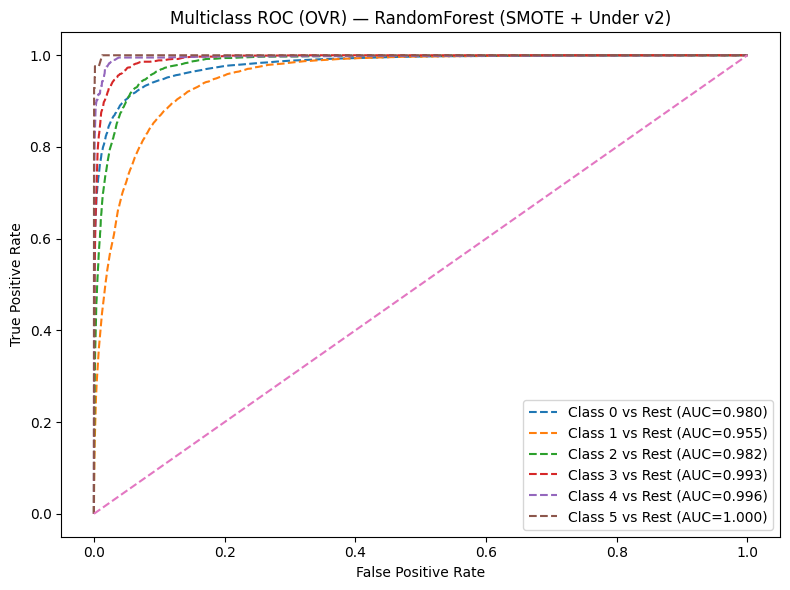

In [ ]:
# Important : ordre des classes correspondant aux colonnes
classes = pipe.classes_
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(8,6))

for j, c in enumerate(classes):
    # y_true binaire pour la classe c
    y_true_bin = y_test_bin[:, j]

    # Si la classe est absente du test, ROC non définie
    if y_true_bin.sum() == 0:
        print(f"Classe {c} absente dans y_test -> ROC/AUC non définie")
        continue

    # score 1D = proba de la classe c
    y_score = y_proba_rf_res_v3[:, j]

    fpr[c], tpr[c], _ = roc_curve(y_true_bin, y_score)
    roc_auc[c] = auc(fpr[c], tpr[c])

    plt.plot(fpr[c], tpr[c], linestyle="--", label=f"Class {c} vs Rest (AUC={roc_auc[c]:.3f})")

plt.plot([0,1], [0,1], linestyle="--")  # baseline
plt.title("Multiclass ROC (OVR) — RandomForest (SMOTE + Under v2)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("multiclass_roc_rf_smote_under_v2.png", dpi=300)
plt.show()


Analyse des résultats :
Si on compare en terme de f1 score et recall, le modèle random forest avec SMOTE est plus performant sur les classes minoritaires (3, 4 et 5) que le random forest sans aucun rééquilibrage. Sur les classes majoritaires les résultats restent similaires. Les résultats s'améliorent davantage lorsqu'on applique en plus un sous échantillonage. Les résultats restent globlament bons peu importe la méthode, mais le suréchatilloange SMOTE combiné au sous-échantilloange permettent d'avoir de meilleurs résultats sur les classes minoritaires.



##LOGISTIC REGRESSION MULTICLASS

Dans le cadre de cette étude, connaître l'effet de chaque indice/ variable de notre base de données sur le score de sécheresse est une information importante.  Contrairement aux modèles de type « boîte noire », tels que les forêts aléatoires ou les méthodes de boosting, la régression logistique permet d’analyser explicitement l’influence des différents indices météorologiques et variables géographiques sur la probabilité d’appartenance à chaque niveau de score de sécheresse.
Pour cela la régression logistique multinomiale a été retenue comme modèle en raison de son haut niveau d’interprétabilité.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Contrairement aux modèles de boosting (XGboost) ou bagging (random forest) tels que random forest ou Xgboost qui se basent sur des seuils et des comparaisons, les modèles linéaires sont sensiblent aux échelles. Donc on standardisent nos données pour ce modèle.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
logit_multi = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5,C=1, max_iter=1000, random_state=42, multi_class='multinomial')
logit_multi.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, l1_ratio=0.5, max_iter=1000, multi_class='multinomial',
                   penalty='elasticnet', random_state=42, solver='saga')

Texte pénalisation elastic net :

In [ ]:
y_pred_logit_multi = logit_multi.predict(X_test_scaled)

print("F1 macro:", f1_score(y_test, y_pred_logit_multi, average="macro"))
print(classification_report(y_test, y_pred_logit_multi))

F1 macro: 0.30579045048641945
              precision    recall  f1-score   support

           0       0.83      0.99      0.91     53199
           1       0.15      0.01      0.02      6926
           2       0.34      0.05      0.08      3349
           3       0.42      0.14      0.20      1350
           4       0.49      0.46      0.48       402
           5       0.33      0.10      0.15        42

    accuracy                           0.82     65268
   macro avg       0.43      0.29      0.31     65268
weighted avg       0.72      0.82      0.75     65268



Pour avoir les effets des variables sur le score de sécheresse :

In [ ]:
feature_names = X_train.columns

coef = pd.DataFrame(
    logit_multi.coef_,
    columns=feature_names,
    index=[f"classe_{c}" for c in logit_multi.classes_]
)

intercept = pd.Series(logit_multi.intercept_, index=coef.index, name="intercept")
coef.head()


In [ ]:
y_proba_logit_multi = logit_multi.predict_proba(X_test_scaled)

In [ ]:
y_proba_logit_multi.shape #verif

(65268, 6)

In [ ]:
auc_macro_ovr_logit_multi = roc_auc_score(y_test, y_proba_logit_multi, multi_class="ovr", average="macro",labels=logit_multi.classes_)
print("AUC macro OVR =", auc_macro_ovr_logit_multi)

AUC macro OVR = 0.8574565775031782


In [ ]:
classes = logit_multi.classes_  # ordre des colonnes dans predict_proba
for j, c in enumerate(classes):
    y_true_bin = (y_test == c).astype(int)

    # Si la classe c n'existe pas dans y_test, AUC impossible
    if y_true_bin.sum() == 0 or y_true_bin.sum() == len(y_true_bin):
        print(f"AUC classe {c} : non définie (classe absente ou tous positifs)")
        continue

    y_score_c = y_proba_logit_multi[:, j]  # colonne correspondant à la classe c
    fpr, tpr, _ = roc_curve(y_true_bin, y_score_c)
    print(f"AUC classe {c} = {auc(fpr, tpr):.4f}")

AUC classe 0 = 0.7922
AUC classe 1 = 0.7088
AUC classe 2 = 0.7952
AUC classe 3 = 0.8902
AUC classe 4 = 0.9639
AUC classe 5 = 0.9944


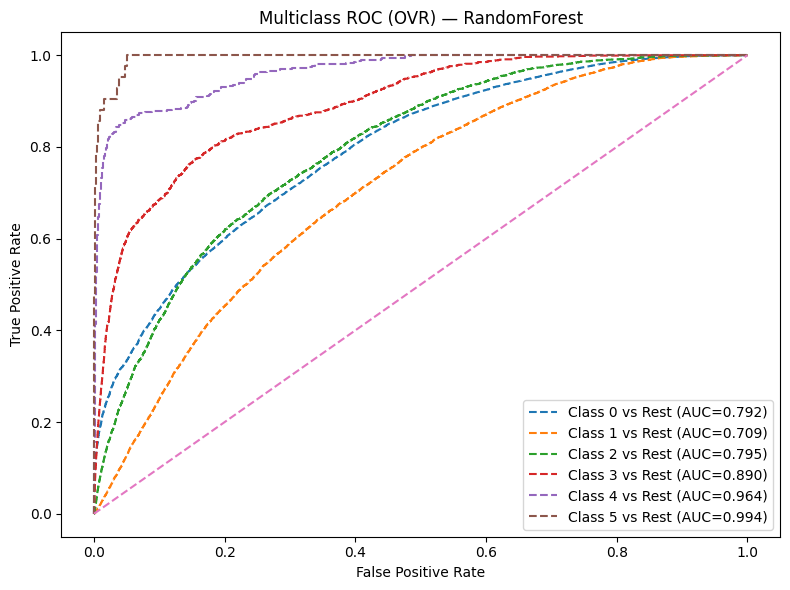

In [ ]:
# Important : ordre des classes correspondant aux colonnes
classes = logit_multi.classes_
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(8,6))

for j, c in enumerate(classes):
    # y_true binaire pour la classe c
    y_true_bin = y_test_bin[:, j]

    # Si la classe est absente du test, ROC non définie
    if y_true_bin.sum() == 0:
        print(f"Classe {c} absente dans y_test -> ROC/AUC non définie")
        continue

    # score 1D = proba de la classe c
    y_score = y_proba_logit_multi[:, j]

    fpr[c], tpr[c], _ = roc_curve(y_true_bin, y_score)
    roc_auc[c] = auc(fpr[c], tpr[c])

    plt.plot(fpr[c], tpr[c], linestyle="--", label=f"Class {c} vs Rest (AUC={roc_auc[c]:.3f})")

plt.plot([0,1], [0,1], linestyle="--")  # baseline
plt.title("Multiclass ROC (OVR) — Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("multiclass_roc_rf_smote_under_v2.png", dpi=300)
plt.show()


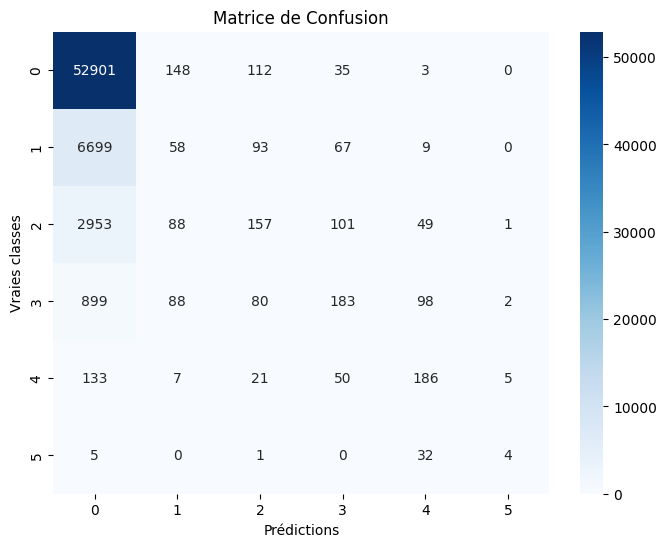

In [ ]:
cm = confusion_matrix(y_test, y_pred_logit_multi)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()

## LOGISTIC REGRESSION : SMOTE

In [ ]:
sampling_strategy = {
    0: 213018,
    1: 27626,
    2: 13349,
    3: 12000,
    4: 4000,
    5: 1000
}

smote = SMOTE(sampling_strategy = sampling_strategy, random_state=42)
X_train_scaled_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print(Counter(y_train_res))

Counter({0: 213018, 1: 27626, 2: 13349, 3: 12000, 4: 4000, 5: 1000})


On reapplique l'algorithme SMOTE à notre base standardisée.

In [ ]:
logit_multi_res = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5,C=1, max_iter=1000, random_state=42, multi_class='multinomial')
logit_multi_res.fit(X_train_scaled_res, y_train_res)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, l1_ratio=0.5, max_iter=1000, multi_class='multinomial',
                   penalty='elasticnet', random_state=42, solver='saga')

In [ ]:
y_pred_logit_multi_res = logit_multi_res.predict(X_test_scaled)
y_proba_logit_multi_res = logit_multi_res.predict_proba(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred_logit_multi_res))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     53199
           1       0.11      0.00      0.00      6926
           2       0.18      0.00      0.01      3349
           3       0.28      0.33      0.30      1350
           4       0.43      0.44      0.44       402
           5       0.25      0.45      0.32        42

    accuracy                           0.82     65268
   macro avg       0.35      0.37      0.33     65268
weighted avg       0.71      0.82      0.75     65268



On remarque que les performances sur la classe minoritaire est meilleur ici.

In [ ]:
auc_macro_ovr_logit_multi_res = roc_auc_score(y_test, y_proba_logit_multi_res, multi_class="ovr", average="macro",labels=logit_multi.classes_)
print("AUC macro OVR =", auc_macro_ovr_logit_multi_res)

AUC macro OVR = 0.8575849388341249


In [ ]:
classes = logit_multi_res.classes_  # ordre des colonnes dans predict_proba
for j, c in enumerate(classes):
    y_true_bin = (y_test == c).astype(int)

    # Si la classe c n'existe pas dans y_test, AUC impossible
    if y_true_bin.sum() == 0 or y_true_bin.sum() == len(y_true_bin):
        print(f"AUC classe {c} : non définie (classe absente ou tous positifs)")
        continue

    y_score_c = y_proba_logit_multi_res[:, j]  # colonne correspondant à la classe c
    fpr, tpr, _ = roc_curve(y_true_bin, y_score_c)
    print(f"AUC classe {c} = {auc(fpr, tpr):.4f}")

AUC classe 0 = 0.7929
AUC classe 1 = 0.7076
AUC classe 2 = 0.7931
AUC classe 3 = 0.8902
AUC classe 4 = 0.9656
AUC classe 5 = 0.9961


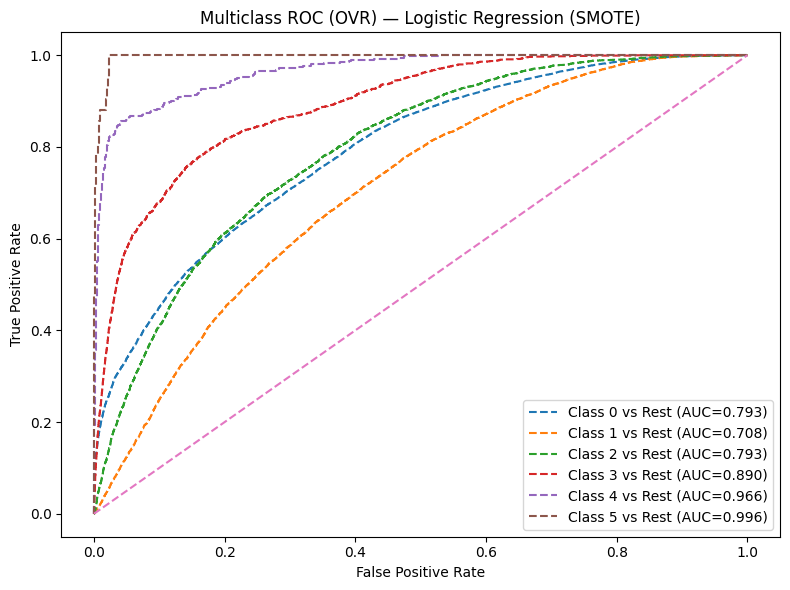

In [ ]:
# Important : ordre des classes correspondant aux colonnes
classes = logit_multi_res.classes_
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(8,6))

for j, c in enumerate(classes):
    # y_true binaire pour la classe c
    y_true_bin = y_test_bin[:, j]

    # Si la classe est absente du test, ROC non définie
    if y_true_bin.sum() == 0:
        print(f"Classe {c} absente dans y_test -> ROC/AUC non définie")
        continue

    # score 1D = proba de la classe c
    y_score = y_proba_logit_multi_res[:, j]

    fpr[c], tpr[c], _ = roc_curve(y_true_bin, y_score)
    roc_auc[c] = auc(fpr[c], tpr[c])

    plt.plot(fpr[c], tpr[c], linestyle="--", label=f"Class {c} vs Rest (AUC={roc_auc[c]:.3f})")

plt.plot([0,1], [0,1], linestyle="--")  # baseline
plt.title("Multiclass ROC (OVR) — Logistic Regression (SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("multiclass_roc_rf_smote_under_v2.png", dpi=300)
plt.show()


Sur les classes les plus rares le modèle avec SMOTE est beacoup plus performant.

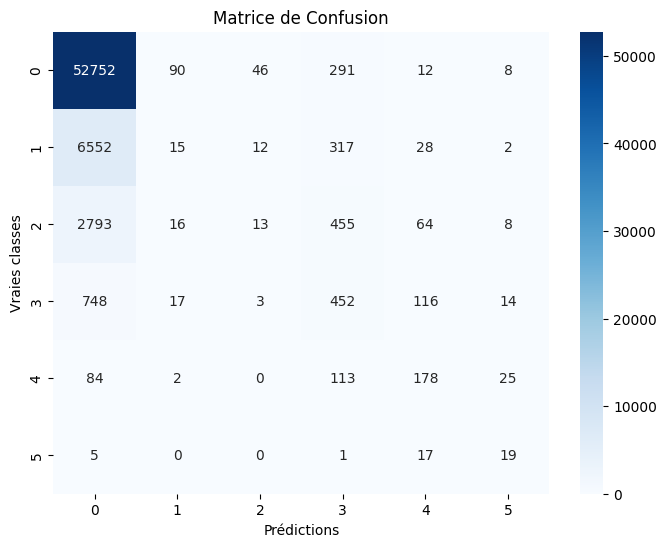

In [ ]:
cm = confusion_matrix(y_test, y_pred_logit_multi_res)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()

##LOGISTIC REGRESSION SMOTE + UNDERSAMPLING

In [ ]:
#SMOTE : on fixe un nombre cible par classe (dict = multiclass)
smote_strategy = {
    2: 20000,
    3: 20000,
    4: 20000,
    5: 5000
}

#Under-sampling : on fixe des tailles finales par classe
under_strategy = {
    0: 60000, #On réduit la classe majoritaire de façon forfaitaire
    1: 27626,
    2: 20000,
    3: 20000,
    4: 20000,
    5: 5000
}

resampler_v2 = Pipeline(steps=[
    ("smote", SMOTE(sampling_strategy=smote_strategy, k_neighbors=5, random_state=42)),
    ("under", RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)),
])


In [ ]:
X_train_res_scaled_v2, y_train_res_v2 = resampler_v2.fit_resample(X_train_scaled, y_train)

logit_multi_res_v2 = LogisticRegression(
    penalty="elasticnet", solver="saga", l1_ratio=0.5,
    C=1, max_iter=1000, random_state=42, multi_class="multinomial"
)

logit_multi_res_v2.fit(X_train_res_scaled_v2, y_train_res_v2)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, l1_ratio=0.5, max_iter=1000, multi_class='multinomial',
                   penalty='elasticnet', random_state=42, solver='saga')

In [ ]:
y_pred_logit_multi_res_v2 = logit_multi_res_v2.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred_logit_multi_res_v2))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     53199
           1       0.24      0.13      0.17      6926
           2       0.13      0.08      0.10      3349
           3       0.13      0.35      0.19      1350
           4       0.16      0.68      0.26       402
           5       0.11      0.48      0.17        42

    accuracy                           0.76     65268
   macro avg       0.27      0.43      0.30     65268
weighted avg       0.75      0.76      0.75     65268



In [ ]:
y_proba_logit_multi_res_v2 = logit_multi_res_v2.predict_proba(X_test_scaled)

In [ ]:
auc_macro_ovr_logit_multi_res_v2 = roc_auc_score(y_test, y_proba_logit_multi_res_v2, multi_class="ovr", average="macro",labels=logit_multi.classes_)
print("AUC macro OVR =", auc_macro_ovr_logit_multi_res_v2)

AUC macro OVR = 0.8445237867023083


In [ ]:
for k in range(0,6):
    y_true_bin = (y_test == k).astype(int)
    y_score_k = y_proba_logit_multi_res_v2[:, k]

    fpr, tpr, _ = roc_curve(y_true_bin, y_score_k)
    print("AUC classe", k, "=", auc(fpr, tpr))

AUC classe 0 = 0.7973109970838479
AUC classe 1 = 0.668775577384701
AUC classe 2 = 0.76362150397211
AUC classe 3 = 0.8729601120880572
AUC classe 4 = 0.9677488593783772
AUC classe 5 = 0.9967256703067575


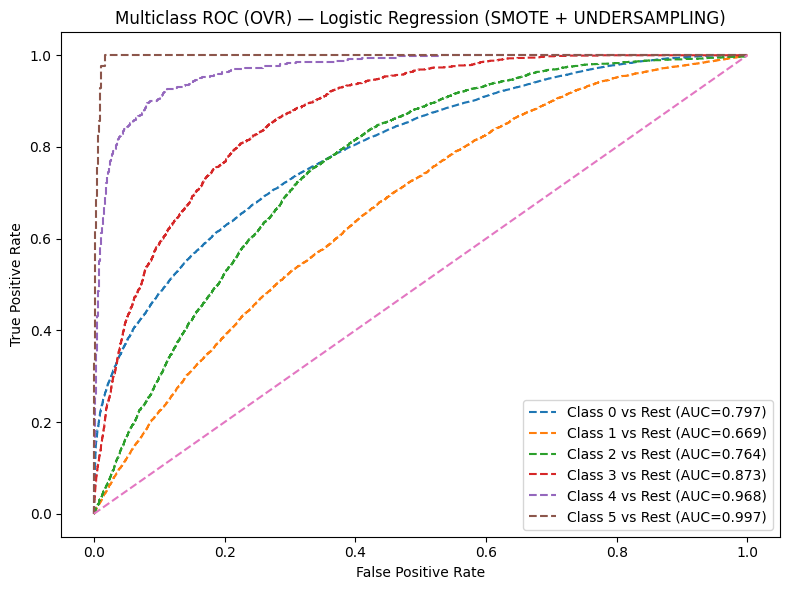

In [ ]:
# Important : ordre des classes correspondant aux colonnes
classes = logit_multi_res_v2.classes_
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(8,6))

for j, c in enumerate(classes):
    # y_true binaire pour la classe c
    y_true_bin = y_test_bin[:, j]

    # Si la classe est absente du test, ROC non définie
    if y_true_bin.sum() == 0:
        print(f"Classe {c} absente dans y_test -> ROC/AUC non définie")
        continue

    # score 1D = proba de la classe c
    y_score = y_proba_logit_multi_res_v2[:, j]

    fpr[c], tpr[c], _ = roc_curve(y_true_bin, y_score)
    roc_auc[c] = auc(fpr[c], tpr[c])

    plt.plot(fpr[c], tpr[c], linestyle="--", label=f"Class {c} vs Rest (AUC={roc_auc[c]:.3f})")

plt.plot([0,1], [0,1], linestyle="--")  # baseline
plt.title("Multiclass ROC (OVR) — Logistic Regression (SMOTE + UNDERSAMPLING)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("multiclass_roc_rf_smote_under_v2.png", dpi=300)
plt.show()


##LOGISTIC REGRESSION SMOTE + UNDERSAMPLING (version 2)



In [ ]:
smote_strategy = {1: 30000, 2: 30000, 3: 30000, 4: 30000, 5: 30000}
under_strategy = {0: 60000, 1: 30000, 2: 30000, 3: 30000, 4: 30000, 5: 30000}

In [ ]:
logit_multi_res_v3 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5,C=1, max_iter=1000, random_state=42, multi_class='multinomial')

resampler_v2 = Pipeline(steps=[
    ("smote", SMOTE(sampling_strategy=smote_strategy, k_neighbors=5, random_state=42)),
    ("under", RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)),
])

In [ ]:
X_train_scaled_res_v3, y_train_res_v3 = resampler_v2.fit_resample(X_train_scaled, y_train)

In [ ]:
logit_multi_res_v3.fit(X_train_scaled_res_v3, y_train_res_v3)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, l1_ratio=0.5, max_iter=1000, multi_class='multinomial',
                   penalty='elasticnet', random_state=42, solver='saga')

In [ ]:
y_pred_logit_multi_res_v3 = logit_multi_res_v3.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred_logit_multi_res_v3))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87     53199
           1       0.24      0.08      0.12      6926
           2       0.11      0.16      0.13      3349
           3       0.11      0.37      0.17      1350
           4       0.14      0.55      0.23       402
           5       0.06      0.88      0.12        42

    accuracy                           0.73     65268
   macro avg       0.26      0.48      0.27     65268
weighted avg       0.76      0.73      0.74     65268



In [ ]:
y_proba_logit_multi_res_v3 = logit_multi_res_v3.predict_proba(X_test_scaled)

In [ ]:
auc_macro_ovr_logit_multi_res_v3 = roc_auc_score(y_test, y_proba_logit_multi_res_v3, multi_class="ovr", average="macro",labels=logit_multi.classes_)
print("AUC macro OVR =", auc_macro_ovr_logit_multi_res_v3)

AUC macro OVR = 0.8330770538886166


In [ ]:
for k in range(0,6):
    y_true_bin = (y_test == k).astype(int)
    y_score_k = y_proba_logit_multi_res_v3[:, k]

    fpr, tpr, _ = roc_curve(y_true_bin, y_score_k)
    print("AUC classe", k, "=", auc(fpr, tpr))

AUC classe 0 = 0.7971203151507334
AUC classe 1 = 0.6474245710762253
AUC classe 2 = 0.7438359868825825
AUC classe 3 = 0.8545327172662196
AUC classe 4 = 0.9587986055600577
AUC classe 5 = 0.9967501273958822


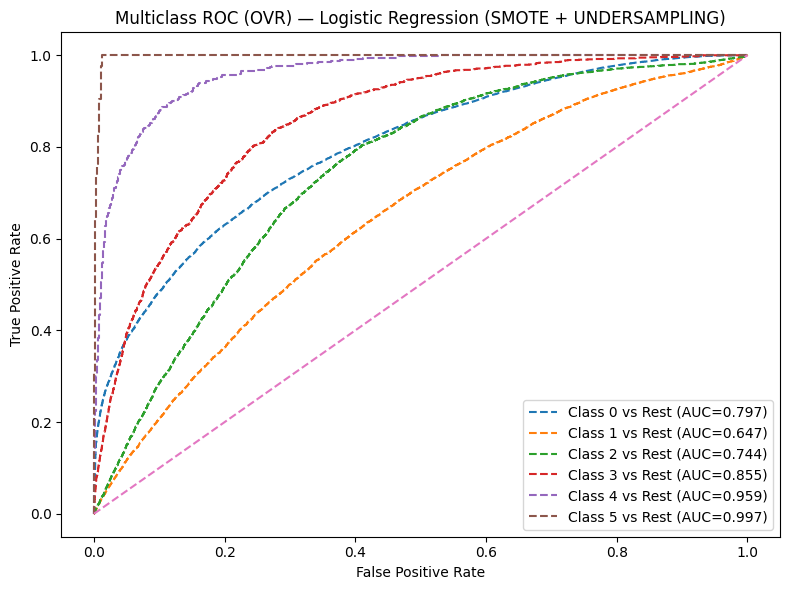

In [ ]:
# Important : ordre des classes correspondant aux colonnes
classes = logit_multi_res_v3.classes_
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(8,6))

for j, c in enumerate(classes):
    # y_true binaire pour la classe c
    y_true_bin = y_test_bin[:, j]

    # Si la classe est absente du test, ROC non définie
    if y_true_bin.sum() == 0:
        print(f"Classe {c} absente dans y_test -> ROC/AUC non définie")
        continue

    # score 1D = proba de la classe c
    y_score = y_proba_logit_multi_res_v3[:, j]

    fpr[c], tpr[c], _ = roc_curve(y_true_bin, y_score)
    roc_auc[c] = auc(fpr[c], tpr[c])

    plt.plot(fpr[c], tpr[c], linestyle="--", label=f"Class {c} vs Rest (AUC={roc_auc[c]:.3f})")

plt.plot([0,1], [0,1], linestyle="--")  # baseline
plt.title("Multiclass ROC (OVR) — Logistic Regression (SMOTE + UNDERSAMPLING)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("multiclass_roc_rf_smote_under_v2.png", dpi=300)
plt.show()


On réalise la même conclusion pour ce modèle, les AUC des classes minoritaires sont plus élévées lorsqu'on applique un rééchantillonage basé sur SMOTE et sous échantillonage. Nous retrouvons donc les résultats du papier de recherche.

Pistes d'amélioration :

*   On pourrait chsoisir le nombre des k plus proches voisins de façon automatique.
*   Dans la partie modélisation faire du tuning sur les hyperparamètres.

*   Faire plus de tests d'échantillonage afin d'avoir le modèle le plus performant. Dans notre cas nous avons jugé que les résultats obtenus étaient suffisamment bons, mais cela peut être justifié en réalisant cette étude.

*   Le paramètre k_neighbors=5 (valeur classique) contrôle la manière dont les points synthétiques sont générés : plus k est petit, plus on génère “localement” (utile quand une classe est très rare) ; plus k est grand, plus on lisse (mais on peut mélanger des zones différentes).







# MODELISATION BINAIRE

L'objectif de cette section est de transformer notre problématique de prédiction du score de sécheresse en classe binaire. Plutôt que de prédire le niveau précis de sévérité (de 0 à 5), nous nous concentrons ici sur une distinction : absence ou présence d'un état de sécheresse

In [ ]:
X['score'] = (X['score'] >= 1).astype(int)
print(X['score'].value_counts())

score
0    266217
1     60123
Name: count, dtype: int64


In [ ]:
df = X.drop(columns=var_supp)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df["score"], test_size=0.20, random_state=42)

In [ ]:
# Répartition de notre variable score
X_train["score"].value_counts()

score
0    213018
1     48054
Name: count, dtype: int64

In [ ]:
X_train["score"] == y_train

294559    True
24270     True
78609     True
238512    True
174372    True
          ... 
119879    True
259178    True
131932    True
146867    True
121958    True
Name: score, Length: 261072, dtype: bool

In [ ]:
X_test["score"] == y_test

212814    True
20908     True
111723    True
219392    True
16785     True
          ... 
209748    True
79927     True
129104    True
20233     True
201635    True
Name: score, Length: 65268, dtype: bool

In [ ]:
X_train = X_train.drop(columns="score")
X_test = X_test.drop(columns="score")

In [ ]:
nomi_features = ['SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7']
cat_indices = [X_train.columns.get_loc(col) for col in nomi_features if col in X_train.columns]

nomi_features contient les noms des colonnes qui ne sont pas des mesures numériques continues mais des variables qualitatives. SMOTE-NC a besoin de connaître les variables nominales pour appliquer un traitement différencié.

In [ ]:
print(f"Nombre de colonnes dans X_train : {X_train.shape[1]}")
print(f"Indices catégoriels détectés : {cat_indices}")

Nombre de colonnes dans X_train : 42
Indices catégoriels détectés : [32, 33, 34, 35, 36, 37, 38]


In [ ]:
# STRATÉGIES DE RÉÉCHANTILLONNAGE
strategies = {
    "1. Baseline": None,

    "2. Under-sampling": RandomUnderSampler(sampling_strategy='majority', random_state=42),

    "3. SMOTE Simple": Pipeline([
        # Traite les catégories comme des nombres (méthode "naïve")
        ('smote', SMOTE(random_state=42)),
        ('clf', RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1))
    ]),

    "4. SMOTE-NC": Pipeline([
        # Méthode spécifique pour données mixtes du papier
        ('smotenc', SMOTENC(categorical_features=cat_indices, random_state=42)),
        ('clf', RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1))
    ]),

    "5. Combo SMOTE-NC + Under": Pipeline([
        ('smote', SMOTENC(categorical_features=cat_indices, sampling_strategy=0.5, random_state=42)),
        ('under', RandomUnderSampler(sampling_strategy=0.8, random_state=42)),
        ('clf', RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1))
    ])
}

                       ANALYSE COMPARATIVE DES STRATÉGIES DE RÉÉQUILIBRAGE BINAIRE                       

TABLEAU DE SYNTHÈSE DES RÉSULTATS :
                Stratégie  Train_Size Ratio_0:1    TP   FP    TN   FN  Rappel_%  FPR_%    AUC  F1-Score
              1. Baseline      261072    4.43:1  6672  572 52627 5397     55.28   1.08 0.9585    0.6909
        2. Under-sampling       96108    1.00:1 11003 6794 46405 1066     91.17  12.77 0.9580    0.7368
          3. SMOTE Simple      426036    1.00:1 10680 6739 46460 1389     88.49  12.67 0.9503    0.7244
              4. SMOTE-NC      426036    1.00:1 10703 6852 46347 1366     88.68  12.88 0.9504    0.7226
5. Combo SMOTE-NC + Under      319527    2.00:1 10349 5127 48072 1720     85.75   9.64 0.9536    0.7514


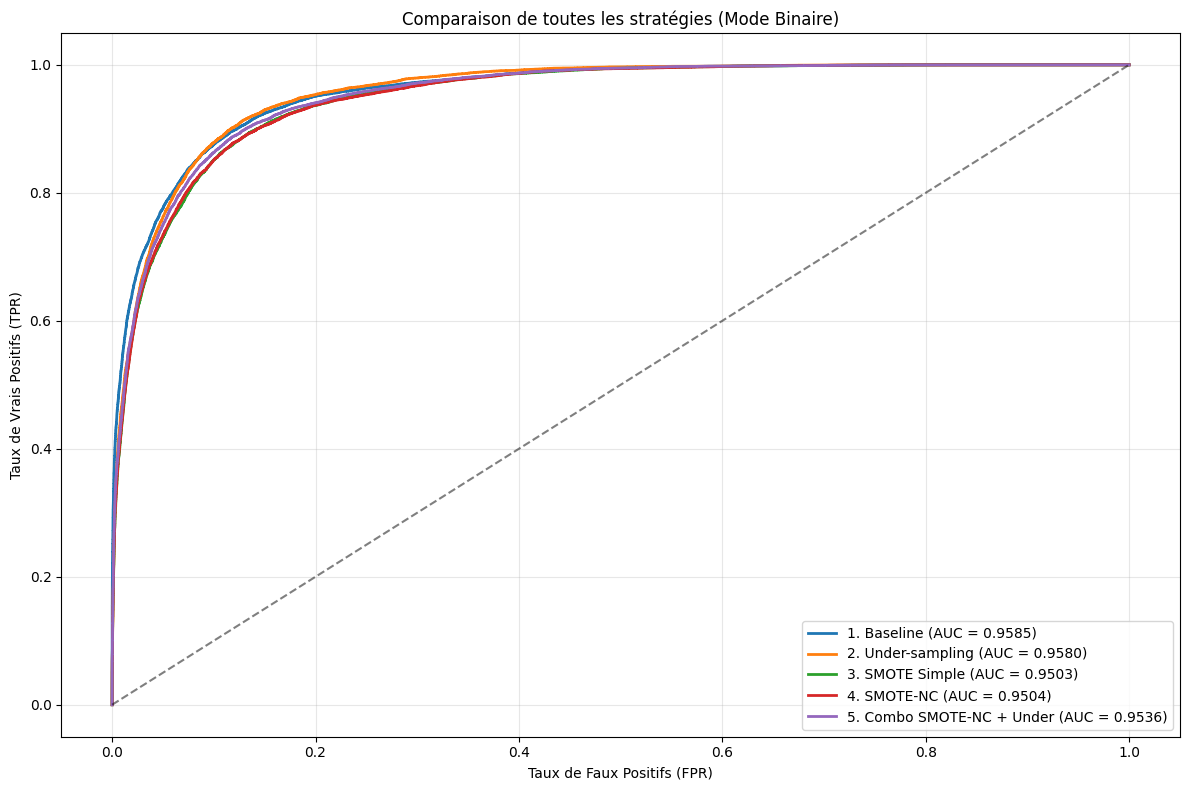

In [ ]:
results = []
plt.figure(figsize=(12, 8))

print(f"{'='*105}")
print(f"{'ANALYSE COMPARATIVE DES STRATÉGIES DE RÉÉQUILIBRAGE BINAIRE':^105}")
print(f"{'='*105}\n")

for name, model in strategies.items():
    # A. Entraînement et récupération des stats de volume
    if model is None:
        clf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1).fit(X_train, y_train)
        y_res = y_train
    elif isinstance(model, RandomUnderSampler):
        X_res, y_res = model.fit_resample(X_train, y_train)
        clf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1).fit(X_res, y_res)
    else:
        model.fit(X_train, y_train)
        _, y_res = model.steps[0][1].fit_resample(X_train, y_train)
        clf = model.named_steps['clf']

    # B. Prédictions
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    # C. Calcul des métriques de performance
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    auc_score = roc_auc_score(y_test, y_proba)
    tpr = tp / (tp + fn)
    fpr_rate = fp / (fp + tn) # False Positive Rate

    # D. Stockage dans la liste des résultats
    results.append({
        "Stratégie": name,
        "Train_Size": len(y_res),
        "Ratio_0:1": f"{np.bincount(y_res)[0]/np.bincount(y_res)[1]:.2f}:1",
        "TP": tp, "FP": fp, "TN": tn, "FN": fn,
        "Rappel_%": round(tpr * 100, 2),
        "FPR_%": round(fpr_rate * 100, 2),
        "AUC": round(auc_score, 4),
        "F1-Score": round(f1_score(y_test, y_pred), 4)
    })

    # E. Tracé de la courbe ROC (avec label corrigé pour la légende)
    fpr, tpr_curve, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr_curve, lw=2, label=f'{name} (AUC = {auc_score:.4f})')

# =================================================================
# 4. AFFICHAGE DU TABLEAU DE SYNTHÈSE ET DU GRAPHIQUE
# =================================================================
df_results = pd.DataFrame(results)

# Affichage du tableau final
print("TABLEAU DE SYNTHÈSE DES RÉSULTATS :")
print(df_results.to_string(index=False))

# Finalisation du graphique ROC
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Comparaison de toutes les stratégies (Mode Binaire)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

La Baseline est le modèle sans traitement. Il rate près de la moitié des épisodes de sécheresse (55,28%). Nous avons 5397 Faux Négatifs, ce modèle n'est pas viable.
Les deux versions de SMOTE montrent des résultats très proches. Le fait que SMOTE-NC ne surpasse pas nettement le SMOTE simple suggère que les variables météorologiques continues dominent fortement la décision par rapport aux autres variables. SMOTE-NC reste le choix le plus rigoureux car il évite la création de valeurs aberrantes.
La dernière stratégie a un F1-score optimal (0.7514) c'est la valeur la plus haute. Elle offre la meilleure moyenne entre Précision et Rappel.Le taux de fausses alertes est de 9.64% il est nettement mieux maitrisé par rapport aux autres méthodes.